In [1]:
# importing libraries
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.signal import find_peaks
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
import statistics

#%pip install category_encoders
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import roc_auc_score

C:\Users\hp\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
columns = ['subject','Activity','seconds_elapsed', 'acz-axis', 'acy-axis', 'acx-axis','grz-axis', 'gry-axis', 'grx-axis','gyz-axis', 'gyy-axis', 'gyx-axis']
train_df = pd.read_csv('data/Train_data.csv', header = None, names = columns)
val_df = pd.read_csv('data/Test_data.csv', header = None, names = columns)
test_df = pd.read_csv('data/validation_data.csv', header = None, names = columns)

val_df.head()

,subject,Activity,seconds_elapsed,acz-axis,acy-axis,acx-axis,grz-axis,gry-axis,grx-axis,gyz-axis,gyy-axis,gyx-axis
0,19,situp,0.020222,0.321144,-1.757508,-1.447789,-9.492512,1.258580,2.116265,0.037995,-0.030261,-0.245736
1,19,situp,0.040213,0.071995,-1.811185,-1.491401,-9.488778,1.292699,2.112440,0.048964,0.016795,-0.217493
2,19,situp,0.060204,-0.000404,-1.784694,-1.388773,-9.484213,1.320571,2.115699,0.027875,0.037721,-0.193269
3,19,situp,0.080194,0.135134,-1.912775,-1.241668,-9.480106,1.351633,2.114491,-0.024582,0.008976,-0.212727
4,19,situp,0.100185,0.354558,-2.321789,-1.056514,-9.477057,1.395784,2.099418,-0.004255,-0.085027,-0.304666


In [4]:
#checking the shape of the dataset

train_df.shape
#test_df.shape
#val_df.shape

(1036510, 12)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036510 entries, 0 to 1036509
Data columns (total 12 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   subject          1036510 non-null  int64  
 1   Activity         1036510 non-null  object 
 2   seconds_elapsed  1036510 non-null  float64
 3   acz-axis         1036510 non-null  float64
 4   acy-axis         1036510 non-null  float64
 5   acx-axis         1036510 non-null  float64
 6   grz-axis         1036510 non-null  float64
 7   gry-axis         1036510 non-null  float64
 8   grx-axis         1036510 non-null  float64
 9   gyz-axis         1036510 non-null  float64
 10  gyy-axis         1036510 non-null  float64
 11  gyx-axis         1036510 non-null  float64
dtypes: float64(10), int64(1), object(1)
memory usage: 94.9+ MB


In [6]:
#check for missing values

train_df.isnull().sum()

subject            0
Activity           0
seconds_elapsed    0
acz-axis           0
acy-axis           0
acx-axis           0
grz-axis           0
gry-axis           0
grx-axis           0
gyz-axis           0
gyy-axis           0
gyx-axis           0
dtype: int64

In [7]:
test_df.isnull().sum()

subject            0
Activity           0
seconds_elapsed    0
acz-axis           0
acy-axis           0
acx-axis           0
grz-axis           0
gry-axis           0
grx-axis           0
gyz-axis           0
gyy-axis           0
gyx-axis           0
dtype: int64

In [8]:
val_df.isnull().sum()

subject            0
Activity           0
seconds_elapsed    0
acz-axis           0
acy-axis           0
acx-axis           0
grz-axis           0
gry-axis           0
grx-axis           0
gyz-axis           0
gyy-axis           0
gyx-axis           0
dtype: int64

In [9]:
#check for duplicates

duplicated = train_df[train_df.duplicated()]
print(f'Duplicate values are :{len(duplicated)}')

Duplicate values are :0


In [10]:
#check for duplicates

duplicated = test_df[test_df.duplicated()]
print(f'Duplicate values are :{len(duplicated)}')

Duplicate values are :0


In [11]:
#check for duplicates

duplicated = val_df[val_df.duplicated()]
print(f'Duplicate values are :{len(duplicated)}')

Duplicate values are :0


In [12]:
train_df.describe()

,subject,seconds_elapsed,acz-axis,acy-axis,acx-axis,grz-axis,gry-axis,grx-axis,gyz-axis,gyy-axis,gyx-axis
count,1.036510e+06,1.036510e+06,1.036510e+06,1.036510e+06,1.036510e+06,1.036510e+06,1.036510e+06,1.036510e+06,1.036510e+06,1.036510e+06,1.036510e+06
mean,9.288101e+00,1.905290e+02,-2.150406e+00,-1.549415e+00,7.312795e-01,7.456059e-01,5.750975e+00,-2.803694e+00,-9.918335e-03,-1.611853e-02,5.904598e-03
std,5.201677e+00,1.704845e+02,5.470572e+00,5.491530e+00,4.463814e+00,4.082944e+00,4.244601e+00,4.471357e+00,7.644819e-01,1.409190e+00,1.079760e+00
min,1.000000e+00,1.339722e-02,-8.530524e+01,-5.798123e+01,-6.835160e+01,-9.806621e+00,-9.806399e+00,-9.806125e+00,-1.069950e+01,-3.430899e+01,-1.851980e+01
25%,5.000000e+00,5.165235e+01,-3.152467e+00,-2.409865e+00,-2.034422e-01,-1.765296e+00,2.284720e+00,-6.713727e+00,-1.051739e-02,-2.560215e-02,-1.385401e-02
50%,9.000000e+00,1.320993e+02,-1.729691e+00,-1.575802e+00,1.232122e+00,-1.726811e-01,7.523738e+00,-3.492731e+00,3.316715e-04,-6.030000e-05,1.969035e-04
75%,1.400000e+01,2.932260e+02,-2.178132e-01,-5.927925e-01,2.510610e+00,4.279101e+00,9.321750e+00,3.504356e-01,1.560306e-02,2.213714e-02,2.521246e-02
max,1.800000e+01,6.973093e+02,9.018490e+01,7.365791e+01,6.884977e+01,9.806342e+00,9.806648e+00,9.806063e+00,1.139465e+01,3.518501e+01,1.762464e+01


In [13]:
test_df.describe()

,subject,seconds_elapsed,acz-axis,acy-axis,acx-axis,grz-axis,gry-axis,grx-axis,gyz-axis,gyy-axis,gyx-axis
count,329418.000000,329418.000000,329418.000000,329418.000000,329418.000000,329418.000000,329418.000000,329418.000000,329418.000000,329418.000000,329418.000000
mean,27.514265,171.424338,-1.722701,-1.742158,0.597375,-0.562571,6.449985,-3.052111,-0.002229,0.005583,0.006803
std,1.700361,152.784648,4.468064,5.907491,3.959691,3.475270,3.944506,4.159293,1.041285,1.050906,0.788622
min,12.000000,0.013736,-66.856800,-57.444618,-42.022466,-9.806638,-9.632844,-9.806072,-10.202771,-33.749535,-15.318249
25%,26.000000,49.909349,-2.520250,-2.595927,-0.205135,-2.755789,2.921377,-7.731449,-0.017524,-0.054536,-0.016743
50%,28.000000,118.816246,-0.673511,-1.878648,0.610918,-1.311139,8.698298,-2.058694,0.000298,0.000011,0.000466
75%,29.000000,259.760210,0.105888,-0.542103,2.666868,1.970993,9.512788,0.013555,0.029712,0.048182,0.043084
max,30.000000,617.851077,65.314242,59.858006,78.833280,9.805949,9.806645,9.731179,11.455540,21.908182,12.969391


In [14]:
val_df.describe()

,subject,seconds_elapsed,acz-axis,acy-axis,acx-axis,grz-axis,gry-axis,grx-axis,gyz-axis,gyy-axis,gyx-axis
count,313892.000000,313892.000000,313892.000000,313892.000000,313892.000000,313892.000000,313892.000000,313892.000000,313892.000000,313892.000000,313892.000000
mean,21.484495,176.534192,-2.077688,-1.739968,0.311684,0.646995,6.687157,-1.651086,-0.004962,-0.009295,-0.001081
std,1.685807,161.302162,4.807998,5.996767,4.227081,4.475212,3.843630,3.675154,1.054426,1.094805,0.871410
min,19.000000,0.015659,-75.794715,-40.583327,-41.302429,-9.805831,-9.798039,-9.804274,-7.564157,-20.495743,-12.703605
25%,20.000000,48.017251,-3.629322,-2.479229,-0.562472,-2.638521,5.443066,-5.514254,-0.023856,-0.068417,-0.022409
50%,21.000000,118.600003,-2.064158,-2.022962,0.497832,-0.897235,8.986466,-1.327891,0.000235,-0.000288,0.000378
75%,23.000000,266.892549,0.118897,-0.337848,2.153235,5.184584,9.431662,1.145854,0.023392,0.043184,0.042565
max,24.000000,674.317158,88.032653,74.779714,36.421180,8.749193,9.806638,9.806341,9.391775,22.288151,15.015726


In [15]:
train_df.describe(include=['object'])

,Activity
count,1036510
unique,9
top,standing
freq,324992


In [16]:
test_df.describe(include=['object'])

,Activity
count,329418
unique,9
top,standing
freq,95307


In [17]:
val_df.describe(include=['object'])

,Activity
count,313892
unique,9
top,standing
freq,87874


In [18]:
# removing null values
train_df = train_df.dropna()
train_df.shape

test_df = test_df.dropna()
test_df.shape

val_df = val_df.dropna()
val_df.shape

# transforming the z-axis to float for training data
train_df['acz-axis'] = train_df['acz-axis'].astype(str).str.replace(';', '')
train_df['acz-axis'] = train_df['acz-axis'].apply(lambda x:float(x))
train_df['grz-axis'] = train_df['grz-axis'].astype(str).str.replace(';', '')
train_df['grz-axis'] = train_df['grz-axis'].apply(lambda x:float(x))
train_df['gyz-axis'] = train_df['gyz-axis'].astype(str).str.replace(';', '')
train_df['gyz-axis'] = train_df['gyz-axis'].apply(lambda x:float(x))


# drop the rows where timestamp is 0
train_data = train_df[train_df['seconds_elapsed'] != 0]


# now arrange data in ascending order of the subject
train_data = train_data.sort_values(by = ['subject'], ignore_index=True)

# transforming the z-axis to float for test data
test_df['acz-axis'] = test_df['acz-axis'].astype(str).str.replace(';', '')
test_df['acz-axis'] = test_df['acz-axis'].apply(lambda x:float(x))
test_df['grz-axis'] = test_df['grz-axis'].astype(str).str.replace(';', '')
test_df['grz-axis'] = test_df['grz-axis'].apply(lambda x:float(x))
test_df['gyz-axis'] = test_df['gyz-axis'].astype(str).str.replace(';', '')
test_df['gyz-axis'] = test_df['gyz-axis'].apply(lambda x:float(x))


# drop the rows where timestamp is 0
test_data = test_df[test_df['seconds_elapsed'] != 0]


# now arrange data in ascending order of the subject
test_data = test_data.sort_values(by = ['subject'], ignore_index=True)

# transforming the z-axis to float for validation data
val_df['acz-axis'] = val_df['acz-axis'].astype(str).str.replace(';', '')
val_df['acz-axis'] = val_df['acz-axis'].apply(lambda x:float(x))
val_df['grz-axis'] = val_df['grz-axis'].astype(str).str.replace(';', '')
val_df['grz-axis'] = val_df['grz-axis'].apply(lambda x:float(x))
val_df['gyz-axis'] = val_df['gyz-axis'].astype(str).str.replace(';', '')
val_df['gyz-axis'] = val_df['gyz-axis'].apply(lambda x:float(x))


# drop the rows where timestamp is 0
val_data = val_df[val_df['seconds_elapsed'] != 0]


# now arrange data in ascending order of the subject
val_data = val_data.sort_values(by = ['subject'], ignore_index=True)

train_data

,subject,Activity,seconds_elapsed,acz-axis,acy-axis,acx-axis,grz-axis,gry-axis,grx-axis,gyz-axis,gyy-axis,gyx-axis
0,1,situp,0.026295,0.700338,0.299921,0.070063,-9.787154,0.604045,-0.130858,-0.124042,0.616402,-0.047402
1,1,standing,272.315709,-0.290472,-2.392717,-0.247151,-0.320416,9.755107,0.951640,-0.006058,-0.001430,-0.013763
2,1,standing,272.335702,-0.331321,-2.363500,-0.233856,-0.318945,9.755202,0.951170,-0.001914,-0.004859,-0.003692
3,1,standing,272.355695,-0.324797,-2.337483,-0.257222,-0.317307,9.755216,0.951555,0.002863,0.001147,-0.010422
4,1,standing,272.375687,-0.313394,-2.352304,-0.248660,-0.315741,9.755223,0.952018,0.002633,0.001489,-0.007215
...,...,...,...,...,...,...,...,...,...,...,...,...
1036505,18,sitting,314.404918,-4.150999,-0.511599,1.549211,8.783743,1.551880,-4.075278,-0.001933,0.000762,0.002546
1036506,18,sitting,314.424909,-4.120681,-0.492260,1.526129,8.783182,1.551972,-4.076457,-0.003166,0.009003,0.002265
1036507,18,sitting,314.444903,-4.133680,-0.453239,1.550213,8.782316,1.552120,-4.078266,-0.002092,0.010825,0.005548
1036508,18,sitting,314.324949,-4.203790,-0.522570,1.531050,8.782510,1.553250,-4.077413,-0.001305,-0.019585,-0.003417


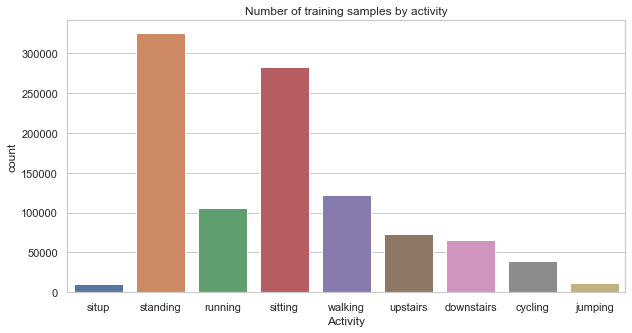

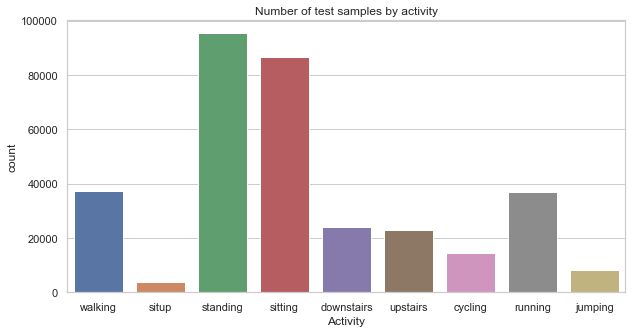

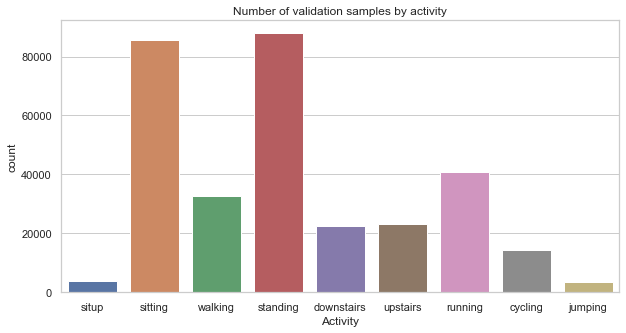

In [19]:
#Analyzing class label distribution
sns.set_theme()
sns.set_style('whitegrid')
plt.figure(figsize = (10, 5))
sns.countplot(x = 'Activity', data = train_data)
plt.title('Number of training samples by activity')
plt.show()

sns.set_theme()
sns.set_style('whitegrid')
plt.figure(figsize = (10, 5))
sns.countplot(x = 'Activity', data = test_data)
plt.title('Number of test samples by activity')
plt.show()

sns.set_theme()
sns.set_style('whitegrid')
plt.figure(figsize = (10, 5))
sns.countplot(x = 'Activity', data = val_data)
plt.title('Number of validation samples by activity')
plt.show()

In [20]:
#function to extract categorical columns from the dataset
categorical = []
for col in train_data:
    if train_data[col].dtype =='object':
        categorical.append(col)
        
#print the categorical columns
print('The categorical columns are :', categorical)

The categorical columns are : ['Activity']


In [21]:
#function to extract categorical columns from the dataset
categorical = []
for col in test_data:
    if test_data[col].dtype =='object':
        categorical.append(col)
        
#print the categorical columns
print('The categorical columns are :', categorical)

categorical = []
for col in val_data:
    if val_data[col].dtype =='object':
        categorical.append(col)
        
#print the categorical columns
print('The categorical columns are :', categorical)

The categorical columns are : ['Activity']
The categorical columns are : ['Activity']


In [22]:
#checking the number of unique values in each of the categorical columns

h_place = {}
for i in list(categorical):
    h_place[i] = train_data[i].value_counts().shape[0]

pd.DataFrame(h_place, index=['Unique Values'])

h_place = {}
for i in list(categorical):
    h_place[i] = test_data[i].value_counts().shape[0]

pd.DataFrame(h_place, index=['Unique Values'])

h_place = {}
for i in list(categorical):
    h_place[i] = val_data[i].value_counts().shape[0]

pd.DataFrame(h_place, index=['Unique Values'])

,Activity
Unique Values,9


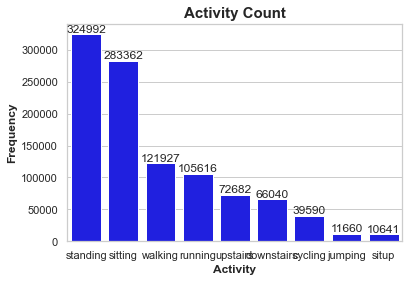

In [23]:
#count plot to visualize sex

sx = sns.countplot(x='Activity', data=train_data, color='blue', order= train_data['Activity'].value_counts().index)
plt.xlabel('Activity',fontweight='bold',fontsize=12)
plt.ylabel('Frequency',fontweight='bold',fontsize=12)
plt.title('Activity Count', fontweight='bold',fontsize=15);

for i in sx.containers:
    sx.bar_label(i)

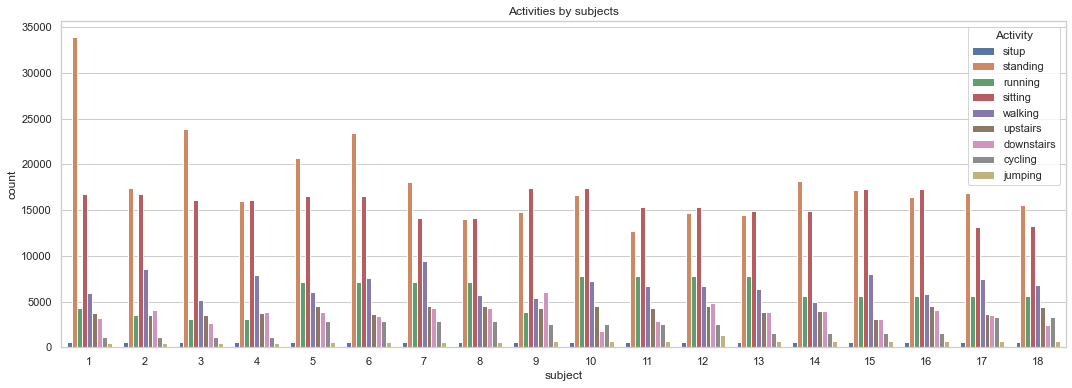

In [24]:
plt.figure(figsize = (18, 6))
sns.countplot(x = 'subject', hue = 'Activity', data = train_data)
plt.title('Activities by subjects')
plt.show()

In [25]:
acdf_train = train_data
acdf_test = test_data
acdf_val = val_data


In [26]:
# Acc Data
acx_list = []
acy_list = []
acz_list = []
grx_list = []
gry_list = []
grz_list = []
gyx_list = []
gyy_list = []
gyz_list = []
actrain_labels = []

window_size = 100
step_size = 50

# creating overlaping windows of size window-size 100
for i in range(0, acdf_train.shape[0] - window_size, step_size):
    acxs = acdf_train['acx-axis'].values[i: i + 100]
    acys = acdf_train['acy-axis'].values[i: i + 100]
    aczs = acdf_train['acz-axis'].values[i: i + 100]
    grxs = acdf_train['grx-axis'].values[i: i + 100]
    grys = acdf_train['gry-axis'].values[i: i + 100]
    grzs = acdf_train['grz-axis'].values[i: i + 100]
    gyxs = acdf_train['gyx-axis'].values[i: i + 100]
    gyys = acdf_train['gyy-axis'].values[i: i + 100]
    gyzs = acdf_train['gyz-axis'].values[i: i + 100]
    label = stats.mode(acdf_train['Activity'][i: i + 100])[0][0]

    acx_list.append(acxs)
    acy_list.append(acys)
    acz_list.append(aczs)
    grx_list.append(grxs)
    gry_list.append(grys)
    grz_list.append(grzs)
    gyx_list.append(gyxs)
    gyy_list.append(gyys)
    gyz_list.append(gyzs)
    actrain_labels.append(label)

# Statistical Features on raw x, y and z in time domain
acX_train = pd.DataFrame()

# mean
acX_train['acx_mean'] = pd.Series(acx_list).apply(lambda x: x.mean())
acX_train['acy_mean'] = pd.Series(acy_list).apply(lambda x: x.mean())
acX_train['acz_mean'] = pd.Series(acz_list).apply(lambda x: x.mean())
acX_train['grx_mean'] = pd.Series(grx_list).apply(lambda x: x.mean())
acX_train['gry_mean'] = pd.Series(gry_list).apply(lambda x: x.mean())
acX_train['grz_mean'] = pd.Series(grz_list).apply(lambda x: x.mean())
acX_train['gyx_mean'] = pd.Series(gyx_list).apply(lambda x: x.mean())
acX_train['gyy_mean'] = pd.Series(gyy_list).apply(lambda x: x.mean())
acX_train['gyz_mean'] = pd.Series(gyz_list).apply(lambda x: x.mean())

# std dev
acX_train['acx_std'] = pd.Series(acx_list).apply(lambda x: x.std())
acX_train['acy_std'] = pd.Series(acy_list).apply(lambda x: x.std())
acX_train['acz_std'] = pd.Series(acz_list).apply(lambda x: x.std())
acX_train['grx_std'] = pd.Series(grx_list).apply(lambda x: x.std())
acX_train['gry_std'] = pd.Series(gry_list).apply(lambda x: x.std())
acX_train['grz_std'] = pd.Series(grz_list).apply(lambda x: x.std())
acX_train['gyx_std'] = pd.Series(gyx_list).apply(lambda x: x.std())
acX_train['gyy_std'] = pd.Series(gyy_list).apply(lambda x: x.std())
acX_train['gyz_std'] = pd.Series(gyz_list).apply(lambda x: x.std())

# avg absolute diff
acX_train['acx_aad'] = pd.Series(acx_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_train['acy_aad'] = pd.Series(acy_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_train['acz_aad'] = pd.Series(acz_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_train['grx_aad'] = pd.Series(grx_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_train['gry_aad'] = pd.Series(gry_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_train['grz_aad'] = pd.Series(grz_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_train['gyx_aad'] = pd.Series(gyx_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_train['gyy_aad'] = pd.Series(gyy_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_train['gyz_aad'] = pd.Series(gyz_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
acX_train['acx_min'] = pd.Series(acx_list).apply(lambda x: x.min())
acX_train['acy_min'] = pd.Series(acy_list).apply(lambda x: x.min())
acX_train['acz_min'] = pd.Series(acz_list).apply(lambda x: x.min())
acX_train['grx_min'] = pd.Series(grx_list).apply(lambda x: x.min())
acX_train['gry_min'] = pd.Series(gry_list).apply(lambda x: x.min())
acX_train['grz_min'] = pd.Series(grz_list).apply(lambda x: x.min())
acX_train['gyx_min'] = pd.Series(gyx_list).apply(lambda x: x.min())
acX_train['gyy_min'] = pd.Series(gyy_list).apply(lambda x: x.min())
acX_train['gyz_min'] = pd.Series(gyz_list).apply(lambda x: x.min())

# max
acX_train['acx_max'] = pd.Series(acx_list).apply(lambda x: x.max())
acX_train['acy_max'] = pd.Series(acy_list).apply(lambda x: x.max())
acX_train['acz_max'] = pd.Series(acz_list).apply(lambda x: x.max())
acX_train['grx_max'] = pd.Series(grx_list).apply(lambda x: x.max())
acX_train['gry_max'] = pd.Series(gry_list).apply(lambda x: x.max())
acX_train['grz_max'] = pd.Series(grz_list).apply(lambda x: x.max())
acX_train['gyx_max'] = pd.Series(gyx_list).apply(lambda x: x.max())
acX_train['gyy_max'] = pd.Series(gyy_list).apply(lambda x: x.max())
acX_train['gyz_max'] = pd.Series(gyz_list).apply(lambda x: x.max())

# max-min diff
acX_train['acx_maxmin_diff'] = acX_train['acx_max'] - acX_train['acx_min']
acX_train['acy_maxmin_diff'] = acX_train['acy_max'] - acX_train['acy_min']
acX_train['acz_maxmin_diff'] = acX_train['acz_max'] - acX_train['acz_min']
acX_train['grx_maxmin_diff'] = acX_train['grx_max'] - acX_train['grx_min']
acX_train['gry_maxmin_diff'] = acX_train['gry_max'] - acX_train['gry_min']
acX_train['grz_maxmin_diff'] = acX_train['grz_max'] - acX_train['grz_min']
acX_train['gyx_maxmin_diff'] = acX_train['gyx_max'] - acX_train['gyx_min']
acX_train['gyy_maxmin_diff'] = acX_train['gyy_max'] - acX_train['gyy_min']
acX_train['gyz_maxmin_diff'] = acX_train['gyz_max'] - acX_train['gyz_min']

# median
acX_train['acx_median'] = pd.Series(acx_list).apply(lambda x: np.median(x))
acX_train['acy_median'] = pd.Series(acy_list).apply(lambda x: np.median(x))
acX_train['acz_median'] = pd.Series(acz_list).apply(lambda x: np.median(x))
acX_train['grx_median'] = pd.Series(grx_list).apply(lambda x: np.median(x))
acX_train['gry_median'] = pd.Series(gry_list).apply(lambda x: np.median(x))
acX_train['grz_median'] = pd.Series(grz_list).apply(lambda x: np.median(x))
acX_train['gyx_median'] = pd.Series(gyx_list).apply(lambda x: np.median(x))
acX_train['gyy_median'] = pd.Series(gyy_list).apply(lambda x: np.median(x))
acX_train['gyz_median'] = pd.Series(gyz_list).apply(lambda x: np.median(x))

# median abs dev 
acX_train['acx_mad'] = pd.Series(acx_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_train['acy_mad'] = pd.Series(acy_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_train['acz_mad'] = pd.Series(acz_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_train['grx_mad'] = pd.Series(grx_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_train['gry_mad'] = pd.Series(gry_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_train['grz_mad'] = pd.Series(grz_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_train['gyx_mad'] = pd.Series(gyx_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_train['gyy_mad'] = pd.Series(gyy_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_train['gyz_mad'] = pd.Series(gyz_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
acX_train['acx_IQR'] = pd.Series(acx_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_train['acy_IQR'] = pd.Series(acy_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_train['acz_IQR'] = pd.Series(acz_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_train['grx_IQR'] = pd.Series(grx_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_train['gry_IQR'] = pd.Series(gry_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_train['grz_IQR'] = pd.Series(grz_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_train['gyx_IQR'] = pd.Series(gyx_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_train['gyy_IQR'] = pd.Series(gyy_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_train['gyz_IQR'] = pd.Series(gyz_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
acX_train['acx_neg_count'] = pd.Series(acx_list).apply(lambda x: np.sum(x < 0))
acX_train['acy_neg_count'] = pd.Series(acy_list).apply(lambda x: np.sum(x < 0))
acX_train['acz_neg_count'] = pd.Series(acz_list).apply(lambda x: np.sum(x < 0))
acX_train['grx_neg_count'] = pd.Series(grx_list).apply(lambda x: np.sum(x < 0))
acX_train['gry_neg_count'] = pd.Series(gry_list).apply(lambda x: np.sum(x < 0))
acX_train['grz_neg_count'] = pd.Series(grz_list).apply(lambda x: np.sum(x < 0))
acX_train['gyx_neg_count'] = pd.Series(gyx_list).apply(lambda x: np.sum(x < 0))
acX_train['gyy_neg_count'] = pd.Series(gyy_list).apply(lambda x: np.sum(x < 0))
acX_train['gyz_neg_count'] = pd.Series(gyz_list).apply(lambda x: np.sum(x < 0))

# positive count
acX_train['acx_pos_count'] = pd.Series(acx_list).apply(lambda x: np.sum(x > 0))
acX_train['acy_pos_count'] = pd.Series(acy_list).apply(lambda x: np.sum(x > 0))
acX_train['acz_pos_count'] = pd.Series(acz_list).apply(lambda x: np.sum(x > 0))
acX_train['grx_pos_count'] = pd.Series(grx_list).apply(lambda x: np.sum(x > 0))
acX_train['gry_pos_count'] = pd.Series(gry_list).apply(lambda x: np.sum(x > 0))
acX_train['grz_pos_count'] = pd.Series(grz_list).apply(lambda x: np.sum(x > 0))
acX_train['gyx_pos_count'] = pd.Series(gyx_list).apply(lambda x: np.sum(x > 0))
acX_train['gyy_pos_count'] = pd.Series(gyy_list).apply(lambda x: np.sum(x > 0))
acX_train['gyz_pos_count'] = pd.Series(gyz_list).apply(lambda x: np.sum(x > 0))

# values above mean
acX_train['acx_above_mean'] = pd.Series(acx_list).apply(lambda x: np.sum(x > x.mean()))
acX_train['acy_above_mean'] = pd.Series(acy_list).apply(lambda x: np.sum(x > x.mean()))
acX_train['acz_above_mean'] = pd.Series(acz_list).apply(lambda x: np.sum(x > x.mean()))
acX_train['grx_above_mean'] = pd.Series(grx_list).apply(lambda x: np.sum(x > x.mean()))
acX_train['gry_above_mean'] = pd.Series(gry_list).apply(lambda x: np.sum(x > x.mean()))
acX_train['grz_above_mean'] = pd.Series(grz_list).apply(lambda x: np.sum(x > x.mean()))
acX_train['gyx_above_mean'] = pd.Series(gyx_list).apply(lambda x: np.sum(x > x.mean()))
acX_train['gyy_above_mean'] = pd.Series(gyy_list).apply(lambda x: np.sum(x > x.mean()))
acX_train['gyz_above_mean'] = pd.Series(gyz_list).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
acX_train['acx_peak_count'] = pd.Series(acx_list).apply(lambda x: len(find_peaks(x)[0]))
acX_train['acy_peak_count'] = pd.Series(acy_list).apply(lambda x: len(find_peaks(x)[0]))
acX_train['acz_peak_count'] = pd.Series(acz_list).apply(lambda x: len(find_peaks(x)[0]))
acX_train['grx_peak_count'] = pd.Series(grx_list).apply(lambda x: len(find_peaks(x)[0]))
acX_train['gry_peak_count'] = pd.Series(gry_list).apply(lambda x: len(find_peaks(x)[0]))
acX_train['grz_peak_count'] = pd.Series(grz_list).apply(lambda x: len(find_peaks(x)[0]))
acX_train['gyx_peak_count'] = pd.Series(gyx_list).apply(lambda x: len(find_peaks(x)[0]))
acX_train['gyy_peak_count'] = pd.Series(gyy_list).apply(lambda x: len(find_peaks(x)[0]))
acX_train['gyz_peak_count'] = pd.Series(gyz_list).apply(lambda x: len(find_peaks(x)[0]))

# skewness
acX_train['acx_skewness'] = pd.Series(acx_list).apply(lambda x: stats.skew(x))
acX_train['acy_skewness'] = pd.Series(acy_list).apply(lambda x: stats.skew(x))
acX_train['acz_skewness'] = pd.Series(acz_list).apply(lambda x: stats.skew(x))
acX_train['grx_skewness'] = pd.Series(grx_list).apply(lambda x: stats.skew(x))
acX_train['gry_skewness'] = pd.Series(gry_list).apply(lambda x: stats.skew(x))
acX_train['grz_skewness'] = pd.Series(grz_list).apply(lambda x: stats.skew(x))
acX_train['gyx_skewness'] = pd.Series(gyx_list).apply(lambda x: stats.skew(x))
acX_train['gyy_skewness'] = pd.Series(gyy_list).apply(lambda x: stats.skew(x))
acX_train['gyz_skewness'] = pd.Series(gyz_list).apply(lambda x: stats.skew(x))

# kurtosis
acX_train['acx_kurtosis'] = pd.Series(acx_list).apply(lambda x: stats.kurtosis(x))
acX_train['acy_kurtosis'] = pd.Series(acy_list).apply(lambda x: stats.kurtosis(x))
acX_train['acz_kurtosis'] = pd.Series(acz_list).apply(lambda x: stats.kurtosis(x))
acX_train['grx_kurtosis'] = pd.Series(grx_list).apply(lambda x: stats.kurtosis(x))
acX_train['gry_kurtosis'] = pd.Series(gry_list).apply(lambda x: stats.kurtosis(x))
acX_train['grz_kurtosis'] = pd.Series(grz_list).apply(lambda x: stats.kurtosis(x))
acX_train['gyx_kurtosis'] = pd.Series(gyx_list).apply(lambda x: stats.kurtosis(x))
acX_train['gyy_kurtosis'] = pd.Series(gyy_list).apply(lambda x: stats.kurtosis(x))
acX_train['gyz_kurtosis'] = pd.Series(gyz_list).apply(lambda x: stats.kurtosis(x))

# energy
acX_train['acx_energy'] = pd.Series(acx_list).apply(lambda x: np.sum(x**2)/100)
acX_train['acy_energy'] = pd.Series(acy_list).apply(lambda x: np.sum(x**2)/100)
acX_train['acz_energy'] = pd.Series(acz_list).apply(lambda x: np.sum(x**2)/100)
acX_train['grx_energy'] = pd.Series(grx_list).apply(lambda x: np.sum(x**2)/100)
acX_train['gry_energy'] = pd.Series(gry_list).apply(lambda x: np.sum(x**2)/100)
acX_train['grz_energy'] = pd.Series(grz_list).apply(lambda x: np.sum(x**2)/100)
acX_train['gyx_energy'] = pd.Series(gyx_list).apply(lambda x: np.sum(x**2)/100)
acX_train['gyy_energy'] = pd.Series(gyy_list).apply(lambda x: np.sum(x**2)/100)
acX_train['gyz_energy'] = pd.Series(gyz_list).apply(lambda x: np.sum(x**2)/100)


# avg resultant
acX_train['avg_result_accl'] = [i.mean() for i in ((pd.Series(acx_list)**2 + pd.Series(acy_list)**2 + pd.Series(acz_list)**2)**0.5)]
acX_train['avg_result_gra'] = [i.mean() for i in ((pd.Series(grx_list)**2 + pd.Series(gry_list)**2 + pd.Series(grz_list)**2)**0.5)]
acX_train['avg_result_gyr'] = [i.mean() for i in ((pd.Series(gyx_list)**2 + pd.Series(gyy_list)**2 + pd.Series(gyz_list)**2)**0.5)]

# signal magnitude area
acX_train['acsma'] =    pd.Series(acx_list).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(acy_list).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(acz_list).apply(lambda x: np.sum(abs(x)/100))
acX_train['grsma'] =    pd.Series(grx_list).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(gry_list).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(grz_list).apply(lambda x: np.sum(abs(x)/100))
acX_train['gysma'] =    pd.Series(gyx_list).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(gyy_list).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(gyz_list).apply(lambda x: np.sum(abs(x)/100))

In [27]:
#acc data
# converting the signals from time domain to frequency domain using FFT
acx_list_fft = pd.Series(acx_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
acy_list_fft = pd.Series(acy_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
acz_list_fft = pd.Series(acz_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
grx_list_fft = pd.Series(grx_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
gry_list_fft = pd.Series(gry_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
grz_list_fft = pd.Series(grz_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
gyx_list_fft = pd.Series(gyx_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
gyy_list_fft = pd.Series(gyy_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
gyz_list_fft = pd.Series(gyz_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])

# Statistical Features on raw x, y and z in frequency domain
# Statistical Features on raw x, y and z in frequency domain
# FFT mean
acX_train['acx_mean_fft'] = pd.Series(acx_list_fft).apply(lambda x: x.mean())
acX_train['acy_mean_fft'] = pd.Series(acy_list_fft).apply(lambda x: x.mean())
acX_train['acz_mean_fft'] = pd.Series(acz_list_fft).apply(lambda x: x.mean())
acX_train['grx_mean_fft'] = pd.Series(grx_list_fft).apply(lambda x: x.mean())
acX_train['gry_mean_fft'] = pd.Series(gry_list_fft).apply(lambda x: x.mean())
acX_train['grz_mean_fft'] = pd.Series(grz_list_fft).apply(lambda x: x.mean())
acX_train['gyx_mean_fft'] = pd.Series(gyx_list_fft).apply(lambda x: x.mean())
acX_train['gyy_mean_fft'] = pd.Series(gyy_list_fft).apply(lambda x: x.mean())
acX_train['gyz_mean_fft'] = pd.Series(gyz_list_fft).apply(lambda x: x.mean())



# FFT std dev
acX_train['acx_std_fft'] = pd.Series(acx_list_fft).apply(lambda x: x.std())
acX_train['acy_std_fft'] = pd.Series(acy_list_fft).apply(lambda x: x.std())
acX_train['acz_std_fft'] = pd.Series(acz_list_fft).apply(lambda x: x.std())
acX_train['grx_std_fft'] = pd.Series(grx_list_fft).apply(lambda x: x.std())
acX_train['gry_std_fft'] = pd.Series(gry_list_fft).apply(lambda x: x.std())
acX_train['grz_std_fft'] = pd.Series(grz_list_fft).apply(lambda x: x.std())
acX_train['gyx_std_fft'] = pd.Series(gyx_list_fft).apply(lambda x: x.std())
acX_train['gyy_std_fft'] = pd.Series(gyy_list_fft).apply(lambda x: x.std())
acX_train['gyz_std_fft'] = pd.Series(gyz_list_fft).apply(lambda x: x.std())

# FFT avg absolute diff
acX_train['acx_aad_fft'] = pd.Series(acx_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_train['acy_aad_fft'] = pd.Series(acy_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_train['acz_aad_fft'] = pd.Series(acz_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_train['grx_aad_fft'] = pd.Series(grx_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_train['gry_aad_fft'] = pd.Series(gry_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_train['grz_aad_fft'] = pd.Series(grz_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_train['gyx_aad_fft'] = pd.Series(gyx_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_train['gyy_aad_fft'] = pd.Series(gyy_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_train['gyz_aad_fft'] = pd.Series(gyz_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))


# FFT min
acX_train['acx_min_fft'] = pd.Series(acx_list_fft).apply(lambda x: x.min())
acX_train['acy_min_fft'] = pd.Series(acy_list_fft).apply(lambda x: x.min())
acX_train['acz_min_fft'] = pd.Series(acz_list_fft).apply(lambda x: x.min())
acX_train['grx_min_fft'] = pd.Series(grx_list_fft).apply(lambda x: x.min())
acX_train['gry_min_fft'] = pd.Series(gry_list_fft).apply(lambda x: x.min())
acX_train['grz_min_fft'] = pd.Series(grz_list_fft).apply(lambda x: x.min())
acX_train['gyx_min_fft'] = pd.Series(gyx_list_fft).apply(lambda x: x.min())
acX_train['gyy_min_fft'] = pd.Series(gyy_list_fft).apply(lambda x: x.min())
acX_train['gyz_min_fft'] = pd.Series(gyz_list_fft).apply(lambda x: x.min())

# FFT max
acX_train['acx_max_fft'] = pd.Series(acx_list_fft).apply(lambda x: x.max())
acX_train['acy_max_fft'] = pd.Series(acy_list_fft).apply(lambda x: x.max())
acX_train['acz_max_fft'] = pd.Series(acz_list_fft).apply(lambda x: x.max())
acX_train['grx_max_fft'] = pd.Series(grx_list_fft).apply(lambda x: x.max())
acX_train['gry_max_fft'] = pd.Series(gry_list_fft).apply(lambda x: x.max())
acX_train['grz_max_fft'] = pd.Series(grz_list_fft).apply(lambda x: x.max())
acX_train['gyx_max_fft'] = pd.Series(gyx_list_fft).apply(lambda x: x.max())
acX_train['gyy_max_fft'] = pd.Series(gyy_list_fft).apply(lambda x: x.max())
acX_train['gyz_max_fft'] = pd.Series(gyz_list_fft).apply(lambda x: x.max())

# FFT max-min diff
acX_train['acx_maxmin_diff_fft'] = acX_train['acx_max_fft'] - acX_train['acx_min_fft']
acX_train['acy_maxmin_diff_fft'] = acX_train['acy_max_fft'] - acX_train['acy_min_fft']
acX_train['acz_maxmin_diff_fft'] = acX_train['acz_max_fft'] - acX_train['acz_min_fft']
acX_train['grx_maxmin_diff_fft'] = acX_train['grx_max_fft'] - acX_train['grx_min_fft']
acX_train['gry_maxmin_diff_fft'] = acX_train['gry_max_fft'] - acX_train['gry_min_fft']
acX_train['grz_maxmin_diff_fft'] = acX_train['grz_max_fft'] - acX_train['grz_min_fft']
acX_train['gyx_maxmin_diff_fft'] = acX_train['gyx_max_fft'] - acX_train['gyx_min_fft']
acX_train['gyy_maxmin_diff_fft'] = acX_train['gyy_max_fft'] - acX_train['gyy_min_fft']
acX_train['gyz_maxmin_diff_fft'] = acX_train['gyz_max_fft'] - acX_train['gyz_min_fft']


# FFT median
acX_train['acx_median_fft'] = pd.Series(acx_list_fft).apply(lambda x: np.median(x))
acX_train['acy_median_fft'] = pd.Series(acy_list_fft).apply(lambda x: np.median(x))
acX_train['acz_median_fft'] = pd.Series(acz_list_fft).apply(lambda x: np.median(x))
acX_train['grx_median_fft'] = pd.Series(grx_list_fft).apply(lambda x: np.median(x))
acX_train['gry_median_fft'] = pd.Series(gry_list_fft).apply(lambda x: np.median(x))
acX_train['grz_median_fft'] = pd.Series(grz_list_fft).apply(lambda x: np.median(x))
acX_train['gyx_median_fft'] = pd.Series(gyx_list_fft).apply(lambda x: np.median(x))
acX_train['gyy_median_fft'] = pd.Series(gyy_list_fft).apply(lambda x: np.median(x))
acX_train['gyz_median_fft'] = pd.Series(gyz_list_fft).apply(lambda x: np.median(x))


# FFT median abs dev 
acX_train['acx_mad_fft'] = pd.Series(acx_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_train['acy_mad_fft'] = pd.Series(acy_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_train['acz_mad_fft'] = pd.Series(acz_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_train['grx_mad_fft'] = pd.Series(grx_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_train['gry_mad_fft'] = pd.Series(gry_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_train['grz_mad_fft'] = pd.Series(grz_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_train['gyx_mad_fft'] = pd.Series(gyx_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_train['gyy_mad_fft'] = pd.Series(gyy_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_train['gyz_mad_fft'] = pd.Series(gyz_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# FFT Interquartile range
acX_train['acx_IQR_fft'] = pd.Series(acx_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_train['acy_IQR_fft'] = pd.Series(acy_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_train['acz_IQR_fft'] = pd.Series(acz_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_train['grx_IQR_fft'] = pd.Series(grx_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_train['gry_IQR_fft'] = pd.Series(gry_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_train['grz_IQR_fft'] = pd.Series(grz_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_train['gyx_IQR_fft'] = pd.Series(gyx_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_train['gyy_IQR_fft'] = pd.Series(gyy_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_train['gyz_IQR_fft'] = pd.Series(gyz_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# FFT values above mean
acX_train['acx_above_mean_fft'] = pd.Series(acx_list_fft).apply(lambda x: np.sum(x > x.mean()))
acX_train['acy_above_mean_fft'] = pd.Series(acy_list_fft).apply(lambda x: np.sum(x > x.mean()))
acX_train['acz_above_mean_fft'] = pd.Series(acz_list_fft).apply(lambda x: np.sum(x > x.mean()))
acX_train['grx_above_mean_fft'] = pd.Series(grx_list_fft).apply(lambda x: np.sum(x > x.mean()))
acX_train['gry_above_mean_fft'] = pd.Series(gry_list_fft).apply(lambda x: np.sum(x > x.mean()))
acX_train['grz_above_mean_fft'] = pd.Series(grz_list_fft).apply(lambda x: np.sum(x > x.mean()))
acX_train['gyx_above_mean_fft'] = pd.Series(gyx_list_fft).apply(lambda x: np.sum(x > x.mean()))
acX_train['gyy_above_mean_fft'] = pd.Series(gyy_list_fft).apply(lambda x: np.sum(x > x.mean()))
acX_train['gyz_above_mean_fft'] = pd.Series(gyz_list_fft).apply(lambda x: np.sum(x > x.mean()))

# FFT number of peaks
acX_train['acx_peak_count_fft'] = pd.Series(acx_list_fft).apply(lambda x: len(find_peaks(x)[0]))
acX_train['acy_peak_count_fft'] = pd.Series(acy_list_fft).apply(lambda x: len(find_peaks(x)[0]))
acX_train['acz_peak_count_fft'] = pd.Series(acz_list_fft).apply(lambda x: len(find_peaks(x)[0]))
acX_train['grx_peak_count_fft'] = pd.Series(grx_list_fft).apply(lambda x: len(find_peaks(x)[0]))
acX_train['gry_peak_count_fft'] = pd.Series(gry_list_fft).apply(lambda x: len(find_peaks(x)[0]))
acX_train['grz_peak_count_fft'] = pd.Series(grz_list_fft).apply(lambda x: len(find_peaks(x)[0]))
acX_train['gyx_peak_count_fft'] = pd.Series(gyx_list_fft).apply(lambda x: len(find_peaks(x)[0]))
acX_train['gyy_peak_count_fft'] = pd.Series(gyy_list_fft).apply(lambda x: len(find_peaks(x)[0]))
acX_train['gyz_peak_count_fft'] = pd.Series(gyz_list_fft).apply(lambda x: len(find_peaks(x)[0]))

# FFT skewness
acX_train['acx_skewness_fft'] = pd.Series(acx_list_fft).apply(lambda x: stats.skew(x))
acX_train['acy_skewness_fft'] = pd.Series(acy_list_fft).apply(lambda x: stats.skew(x))
acX_train['acz_skewness_fft'] = pd.Series(acz_list_fft).apply(lambda x: stats.skew(x))
acX_train['grx_skewness_fft'] = pd.Series(grx_list_fft).apply(lambda x: stats.skew(x))
acX_train['gry_skewness_fft'] = pd.Series(gry_list_fft).apply(lambda x: stats.skew(x))
acX_train['grz_skewness_fft'] = pd.Series(grz_list_fft).apply(lambda x: stats.skew(x))
acX_train['gyx_skewness_fft'] = pd.Series(gyx_list_fft).apply(lambda x: stats.skew(x))
acX_train['gyy_skewness_fft'] = pd.Series(gyy_list_fft).apply(lambda x: stats.skew(x))
acX_train['gyz_skewness_fft'] = pd.Series(gyz_list_fft).apply(lambda x: stats.skew(x))

# FFT kurtosis
acX_train['acx_kurtosis_fft'] = pd.Series(acx_list_fft).apply(lambda x: stats.kurtosis(x))
acX_train['acy_kurtosis_fft'] = pd.Series(acy_list_fft).apply(lambda x: stats.kurtosis(x))
acX_train['acz_kurtosis_fft'] = pd.Series(acz_list_fft).apply(lambda x: stats.kurtosis(x))
acX_train['grx_kurtosis_fft'] = pd.Series(grx_list_fft).apply(lambda x: stats.kurtosis(x))
acX_train['gry_kurtosis_fft'] = pd.Series(gry_list_fft).apply(lambda x: stats.kurtosis(x))
acX_train['grz_kurtosis_fft'] = pd.Series(grz_list_fft).apply(lambda x: stats.kurtosis(x))
acX_train['gyx_kurtosis_fft'] = pd.Series(gyx_list_fft).apply(lambda x: stats.kurtosis(x))
acX_train['gyy_kurtosis_fft'] = pd.Series(gyy_list_fft).apply(lambda x: stats.kurtosis(x))
acX_train['gyz_kurtosis_fft'] = pd.Series(gyz_list_fft).apply(lambda x: stats.kurtosis(x))

# FFT energy
acX_train['acx_energy_fft'] = pd.Series(acx_list_fft).apply(lambda x: np.sum(x**2)/50)
acX_train['acy_energy_fft'] = pd.Series(acy_list_fft).apply(lambda x: np.sum(x**2)/50)
acX_train['acz_energy_fft'] = pd.Series(acz_list_fft).apply(lambda x: np.sum(x**2)/50)
acX_train['grx_energy_fft'] = pd.Series(grx_list_fft).apply(lambda x: np.sum(x**2)/50)
acX_train['gry_energy_fft'] = pd.Series(gry_list_fft).apply(lambda x: np.sum(x**2)/50)
acX_train['grz_energy_fft'] = pd.Series(grz_list_fft).apply(lambda x: np.sum(x**2)/50)
acX_train['gyx_energy_fft'] = pd.Series(gyx_list_fft).apply(lambda x: np.sum(x**2)/50)
acX_train['gyy_energy_fft'] = pd.Series(gyy_list_fft).apply(lambda x: np.sum(x**2)/50)
acX_train['gyz_energy_fft'] = pd.Series(gyz_list_fft).apply(lambda x: np.sum(x**2)/50)

# FFT avg resultant
acX_train['avg_result_accl_fft'] = [i.mean() for i in ((pd.Series(acx_list_fft)**2 + pd.Series(acy_list_fft)**2 + pd.Series(acz_list_fft)**2)**0.5)]
acX_train['avg_result_gra_fft'] = [i.mean() for i in ((pd.Series(grx_list_fft)**2 + pd.Series(gry_list_fft)**2 + pd.Series(grz_list_fft)**2)**0.5)]
acX_train['avg_result_gyr_fft'] = [i.mean() for i in ((pd.Series(gyx_list_fft)**2 + pd.Series(gyy_list_fft)**2 + pd.Series(gyz_list_fft)**2)**0.5)]

# FFT Signal magnitude area
acX_train['acsma_fft'] = pd.Series(acx_list_fft).apply(lambda x: np.sum(abs(x)/50)) + pd.Series(acy_list_fft).apply(lambda x: np.sum(abs(x)/50)) \
                     + pd.Series(acz_list_fft).apply(lambda x: np.sum(abs(x)/50))
acX_train['grsma_fft'] = pd.Series(grx_list_fft).apply(lambda x: np.sum(abs(x)/50)) + pd.Series(gry_list_fft).apply(lambda x: np.sum(abs(x)/50)) \
                     + pd.Series(grz_list_fft).apply(lambda x: np.sum(abs(x)/50))
acX_train['gysma_fft'] = pd.Series(gyx_list_fft).apply(lambda x: np.sum(abs(x)/50)) + pd.Series(gyy_list_fft).apply(lambda x: np.sum(abs(x)/50)) \
                     + pd.Series(gyz_list_fft).apply(lambda x: np.sum(abs(x)/50))

## feature Engineering for validation data

In [28]:
# Acc Data
acx_list = []
acy_list = []
acz_list = []
grx_list = []
gry_list = []
grz_list = []
gyx_list = []
gyy_list = []
gyz_list = []
acval_labels = []

window_size = 100
step_size = 50

# creating overlaping windows of size window-size 100
for i in range(0, acdf_val.shape[0] - window_size, step_size):
    acxs = acdf_val['acx-axis'].values[i: i + 100]
    acys = acdf_val['acy-axis'].values[i: i + 100]
    aczs = acdf_val['acz-axis'].values[i: i + 100]
    grxs = acdf_val['grx-axis'].values[i: i + 100]
    grys = acdf_val['gry-axis'].values[i: i + 100]
    grzs = acdf_val['grz-axis'].values[i: i + 100]
    gyxs = acdf_val['gyx-axis'].values[i: i + 100]
    gyys = acdf_val['gyy-axis'].values[i: i + 100]
    gyzs = acdf_val['gyz-axis'].values[i: i + 100]
    label = stats.mode(acdf_val['Activity'][i: i + 100])[0][0]

    acx_list.append(acxs)
    acy_list.append(acys)
    acz_list.append(aczs)
    grx_list.append(grxs)
    gry_list.append(grys)
    grz_list.append(grzs)
    gyx_list.append(gyxs)
    gyy_list.append(gyys)
    gyz_list.append(gyzs)
    acval_labels.append(label)

# Statistical Features on raw x, y and z in time domain
acX_val = pd.DataFrame()
# mean
acX_val['acx_mean'] = pd.Series(acx_list).apply(lambda x: x.mean())
acX_val['acy_mean'] = pd.Series(acy_list).apply(lambda x: x.mean())
acX_val['acz_mean'] = pd.Series(acz_list).apply(lambda x: x.mean())
acX_val['grx_mean'] = pd.Series(grx_list).apply(lambda x: x.mean())
acX_val['gry_mean'] = pd.Series(gry_list).apply(lambda x: x.mean())
acX_val['grz_mean'] = pd.Series(grz_list).apply(lambda x: x.mean())
acX_val['gyx_mean'] = pd.Series(gyx_list).apply(lambda x: x.mean())
acX_val['gyy_mean'] = pd.Series(gyy_list).apply(lambda x: x.mean())
acX_val['gyz_mean'] = pd.Series(gyz_list).apply(lambda x: x.mean())

# std dev
acX_val['acx_std'] = pd.Series(acx_list).apply(lambda x: x.std())
acX_val['acy_std'] = pd.Series(acy_list).apply(lambda x: x.std())
acX_val['acz_std'] = pd.Series(acz_list).apply(lambda x: x.std())
acX_val['grx_std'] = pd.Series(grx_list).apply(lambda x: x.std())
acX_val['gry_std'] = pd.Series(gry_list).apply(lambda x: x.std())
acX_val['grz_std'] = pd.Series(grz_list).apply(lambda x: x.std())
acX_val['gyx_std'] = pd.Series(gyx_list).apply(lambda x: x.std())
acX_val['gyy_std'] = pd.Series(gyy_list).apply(lambda x: x.std())
acX_val['gyz_std'] = pd.Series(gyz_list).apply(lambda x: x.std())

# avg absolute diff
acX_val['acx_aad'] = pd.Series(acx_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_val['acy_aad'] = pd.Series(acy_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_val['acz_aad'] = pd.Series(acz_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_val['grx_aad'] = pd.Series(grx_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_val['gry_aad'] = pd.Series(gry_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_val['grz_aad'] = pd.Series(grz_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_val['gyx_aad'] = pd.Series(gyx_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_val['gyy_aad'] = pd.Series(gyy_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_val['gyz_aad'] = pd.Series(gyz_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
acX_val['acx_min'] = pd.Series(acx_list).apply(lambda x: x.min())
acX_val['acy_min'] = pd.Series(acy_list).apply(lambda x: x.min())
acX_val['acz_min'] = pd.Series(acz_list).apply(lambda x: x.min())
acX_val['grx_min'] = pd.Series(grx_list).apply(lambda x: x.min())
acX_val['gry_min'] = pd.Series(gry_list).apply(lambda x: x.min())
acX_val['grz_min'] = pd.Series(grz_list).apply(lambda x: x.min())
acX_val['gyx_min'] = pd.Series(gyx_list).apply(lambda x: x.min())
acX_val['gyy_min'] = pd.Series(gyy_list).apply(lambda x: x.min())
acX_val['gyz_min'] = pd.Series(gyz_list).apply(lambda x: x.min())

# max
acX_val['acx_max'] = pd.Series(acx_list).apply(lambda x: x.max())
acX_val['acy_max'] = pd.Series(acy_list).apply(lambda x: x.max())
acX_val['acz_max'] = pd.Series(acz_list).apply(lambda x: x.max())
acX_val['grx_max'] = pd.Series(grx_list).apply(lambda x: x.max())
acX_val['gry_max'] = pd.Series(gry_list).apply(lambda x: x.max())
acX_val['grz_max'] = pd.Series(grz_list).apply(lambda x: x.max())
acX_val['gyx_max'] = pd.Series(gyx_list).apply(lambda x: x.max())
acX_val['gyy_max'] = pd.Series(gyy_list).apply(lambda x: x.max())
acX_val['gyz_max'] = pd.Series(gyz_list).apply(lambda x: x.max())

# max-min diff
acX_val['acx_maxmin_diff'] = acX_train['acx_max'] - acX_train['acx_min']
acX_val['acy_maxmin_diff'] = acX_train['acy_max'] - acX_train['acy_min']
acX_val['acz_maxmin_diff'] = acX_train['acz_max'] - acX_train['acz_min']
acX_val['grx_maxmin_diff'] = acX_train['grx_max'] - acX_train['grx_min']
acX_val['gry_maxmin_diff'] = acX_train['gry_max'] - acX_train['gry_min']
acX_val['grz_maxmin_diff'] = acX_train['grz_max'] - acX_train['grz_min']
acX_val['gyx_maxmin_diff'] = acX_train['gyx_max'] - acX_train['gyx_min']
acX_val['gyy_maxmin_diff'] = acX_train['gyy_max'] - acX_train['gyy_min']
acX_val['gyz_maxmin_diff'] = acX_train['gyz_max'] - acX_train['gyz_min']


# median
acX_val['acx_median'] = pd.Series(acx_list).apply(lambda x: np.median(x))
acX_val['acy_median'] = pd.Series(acy_list).apply(lambda x: np.median(x))
acX_val['acz_median'] = pd.Series(acz_list).apply(lambda x: np.median(x))
acX_val['grx_median'] = pd.Series(grx_list).apply(lambda x: np.median(x))
acX_val['gry_median'] = pd.Series(gry_list).apply(lambda x: np.median(x))
acX_val['grz_median'] = pd.Series(grz_list).apply(lambda x: np.median(x))
acX_val['gyx_median'] = pd.Series(gyx_list).apply(lambda x: np.median(x))
acX_val['gyy_median'] = pd.Series(gyy_list).apply(lambda x: np.median(x))
acX_val['gyz_median'] = pd.Series(gyz_list).apply(lambda x: np.median(x))

# median abs dev 
acX_val['acx_mad'] = pd.Series(acx_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_val['acy_mad'] = pd.Series(acy_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_val['acz_mad'] = pd.Series(acz_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_val['grx_mad'] = pd.Series(grx_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_val['gry_mad'] = pd.Series(gry_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_val['grz_mad'] = pd.Series(grz_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_val['gyx_mad'] = pd.Series(gyx_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_val['gyy_mad'] = pd.Series(gyy_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_val['gyz_mad'] = pd.Series(gyz_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
acX_val['acx_IQR'] = pd.Series(acx_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_val['acy_IQR'] = pd.Series(acy_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_val['acz_IQR'] = pd.Series(acz_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_val['grx_IQR'] = pd.Series(grx_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_val['gry_IQR'] = pd.Series(gry_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_val['grz_IQR'] = pd.Series(grz_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_val['gyx_IQR'] = pd.Series(gyx_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_val['gyy_IQR'] = pd.Series(gyy_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_val['gyz_IQR'] = pd.Series(gyz_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
acX_val['acx_neg_count'] = pd.Series(acx_list).apply(lambda x: np.sum(x < 0))
acX_val['acy_neg_count'] = pd.Series(acy_list).apply(lambda x: np.sum(x < 0))
acX_val['acz_neg_count'] = pd.Series(acz_list).apply(lambda x: np.sum(x < 0))
acX_val['grx_neg_count'] = pd.Series(grx_list).apply(lambda x: np.sum(x < 0))
acX_val['gry_neg_count'] = pd.Series(gry_list).apply(lambda x: np.sum(x < 0))
acX_val['grz_neg_count'] = pd.Series(grz_list).apply(lambda x: np.sum(x < 0))
acX_val['gyx_neg_count'] = pd.Series(gyx_list).apply(lambda x: np.sum(x < 0))
acX_val['gyy_neg_count'] = pd.Series(gyy_list).apply(lambda x: np.sum(x < 0))
acX_val['gyz_neg_count'] = pd.Series(gyz_list).apply(lambda x: np.sum(x < 0))

# positive count
acX_val['acx_pos_count'] = pd.Series(acx_list).apply(lambda x: np.sum(x > 0))
acX_val['acy_pos_count'] = pd.Series(acy_list).apply(lambda x: np.sum(x > 0))
acX_val['acz_pos_count'] = pd.Series(acz_list).apply(lambda x: np.sum(x > 0))
acX_val['grx_pos_count'] = pd.Series(grx_list).apply(lambda x: np.sum(x > 0))
acX_val['gry_pos_count'] = pd.Series(gry_list).apply(lambda x: np.sum(x > 0))
acX_val['grz_pos_count'] = pd.Series(grz_list).apply(lambda x: np.sum(x > 0))
acX_val['gyx_pos_count'] = pd.Series(gyx_list).apply(lambda x: np.sum(x > 0))
acX_val['gyy_pos_count'] = pd.Series(gyy_list).apply(lambda x: np.sum(x > 0))
acX_val['gyz_pos_count'] = pd.Series(gyz_list).apply(lambda x: np.sum(x > 0))

# values above mean
acX_val['acx_above_mean'] = pd.Series(acx_list).apply(lambda x: np.sum(x > x.mean()))
acX_val['acy_above_mean'] = pd.Series(acy_list).apply(lambda x: np.sum(x > x.mean()))
acX_val['acz_above_mean'] = pd.Series(acz_list).apply(lambda x: np.sum(x > x.mean()))
acX_val['grx_above_mean'] = pd.Series(grx_list).apply(lambda x: np.sum(x > x.mean()))
acX_val['gry_above_mean'] = pd.Series(gry_list).apply(lambda x: np.sum(x > x.mean()))
acX_val['grz_above_mean'] = pd.Series(grz_list).apply(lambda x: np.sum(x > x.mean()))
acX_val['gyx_above_mean'] = pd.Series(gyx_list).apply(lambda x: np.sum(x > x.mean()))
acX_val['gyy_above_mean'] = pd.Series(gyy_list).apply(lambda x: np.sum(x > x.mean()))
acX_val['gyz_above_mean'] = pd.Series(gyz_list).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
acX_val['acx_peak_count'] = pd.Series(acx_list).apply(lambda x: len(find_peaks(x)[0]))
acX_val['acy_peak_count'] = pd.Series(acy_list).apply(lambda x: len(find_peaks(x)[0]))
acX_val['acz_peak_count'] = pd.Series(acz_list).apply(lambda x: len(find_peaks(x)[0]))
acX_val['grx_peak_count'] = pd.Series(grx_list).apply(lambda x: len(find_peaks(x)[0]))
acX_val['gry_peak_count'] = pd.Series(gry_list).apply(lambda x: len(find_peaks(x)[0]))
acX_val['grz_peak_count'] = pd.Series(grz_list).apply(lambda x: len(find_peaks(x)[0]))
acX_val['gyx_peak_count'] = pd.Series(gyx_list).apply(lambda x: len(find_peaks(x)[0]))
acX_val['gyy_peak_count'] = pd.Series(gyy_list).apply(lambda x: len(find_peaks(x)[0]))
acX_val['gyz_peak_count'] = pd.Series(gyz_list).apply(lambda x: len(find_peaks(x)[0]))

# skewness
acX_val['acx_skewness'] = pd.Series(acx_list).apply(lambda x: stats.skew(x))
acX_val['acy_skewness'] = pd.Series(acy_list).apply(lambda x: stats.skew(x))
acX_val['acz_skewness'] = pd.Series(acz_list).apply(lambda x: stats.skew(x))
acX_val['grx_skewness'] = pd.Series(grx_list).apply(lambda x: stats.skew(x))
acX_val['gry_skewness'] = pd.Series(gry_list).apply(lambda x: stats.skew(x))
acX_val['grz_skewness'] = pd.Series(grz_list).apply(lambda x: stats.skew(x))
acX_val['gyx_skewness'] = pd.Series(gyx_list).apply(lambda x: stats.skew(x))
acX_val['gyy_skewness'] = pd.Series(gyy_list).apply(lambda x: stats.skew(x))
acX_val['gyz_skewness'] = pd.Series(gyz_list).apply(lambda x: stats.skew(x))

# kurtosis
acX_val['acx_kurtosis'] = pd.Series(acx_list).apply(lambda x: stats.kurtosis(x))
acX_val['acy_kurtosis'] = pd.Series(acy_list).apply(lambda x: stats.kurtosis(x))
acX_val['acz_kurtosis'] = pd.Series(acz_list).apply(lambda x: stats.kurtosis(x))
acX_val['grx_kurtosis'] = pd.Series(grx_list).apply(lambda x: stats.kurtosis(x))
acX_val['gry_kurtosis'] = pd.Series(gry_list).apply(lambda x: stats.kurtosis(x))
acX_val['grz_kurtosis'] = pd.Series(grz_list).apply(lambda x: stats.kurtosis(x))
acX_val['gyx_kurtosis'] = pd.Series(gyx_list).apply(lambda x: stats.kurtosis(x))
acX_val['gyy_kurtosis'] = pd.Series(gyy_list).apply(lambda x: stats.kurtosis(x))
acX_val['gyz_kurtosis'] = pd.Series(gyz_list).apply(lambda x: stats.kurtosis(x))

# energy
acX_val['acx_energy'] = pd.Series(acx_list).apply(lambda x: np.sum(x**2)/100)
acX_val['acy_energy'] = pd.Series(acy_list).apply(lambda x: np.sum(x**2)/100)
acX_val['acz_energy'] = pd.Series(acz_list).apply(lambda x: np.sum(x**2)/100)
acX_val['grx_energy'] = pd.Series(grx_list).apply(lambda x: np.sum(x**2)/100)
acX_val['gry_energy'] = pd.Series(gry_list).apply(lambda x: np.sum(x**2)/100)
acX_val['grz_energy'] = pd.Series(grz_list).apply(lambda x: np.sum(x**2)/100)
acX_val['gyx_energy'] = pd.Series(gyx_list).apply(lambda x: np.sum(x**2)/100)
acX_val['gyy_energy'] = pd.Series(gyy_list).apply(lambda x: np.sum(x**2)/100)
acX_val['gyz_energy'] = pd.Series(gyz_list).apply(lambda x: np.sum(x**2)/100)


# avg resultant
acX_val['avg_result_accl'] = [i.mean() for i in ((pd.Series(acx_list)**2 + pd.Series(acy_list)**2 + pd.Series(acz_list)**2)**0.5)]
acX_val['avg_result_gra'] = [i.mean() for i in ((pd.Series(grx_list)**2 + pd.Series(gry_list)**2 + pd.Series(grz_list)**2)**0.5)]
acX_val['avg_result_gyr'] = [i.mean() for i in ((pd.Series(gyx_list)**2 + pd.Series(gyy_list)**2 + pd.Series(gyz_list)**2)**0.5)]

# signal magnitude area
acX_val['acsma'] =    pd.Series(acx_list).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(acy_list).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(acz_list).apply(lambda x: np.sum(abs(x)/100))
acX_val['grsma'] =    pd.Series(grx_list).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(gry_list).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(grz_list).apply(lambda x: np.sum(abs(x)/100))
acX_val['gysma'] =    pd.Series(gyx_list).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(gyy_list).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(gyz_list).apply(lambda x: np.sum(abs(x)/100))

In [29]:
#acc data
# converting the signals from time domain to frequency domain using FFT
acx_list_fft = pd.Series(acx_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
acy_list_fft = pd.Series(acy_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
acz_list_fft = pd.Series(acz_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
grx_list_fft = pd.Series(grx_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
gry_list_fft = pd.Series(gry_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
grz_list_fft = pd.Series(grz_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
gyx_list_fft = pd.Series(gyx_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
gyy_list_fft = pd.Series(gyy_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
gyz_list_fft = pd.Series(gyz_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])

# Statistical Features on raw x, y and z in frequency domain

# Statistical Features on raw x, y and z in frequency domain
# FFT mean
acX_val['acx_mean_fft'] = pd.Series(acx_list_fft).apply(lambda x: x.mean())
acX_val['acy_mean_fft'] = pd.Series(acy_list_fft).apply(lambda x: x.mean())
acX_val['acz_mean_fft'] = pd.Series(acz_list_fft).apply(lambda x: x.mean())
acX_val['grx_mean_fft'] = pd.Series(grx_list_fft).apply(lambda x: x.mean())
acX_val['gry_mean_fft'] = pd.Series(gry_list_fft).apply(lambda x: x.mean())
acX_val['grz_mean_fft'] = pd.Series(grz_list_fft).apply(lambda x: x.mean())
acX_val['gyx_mean_fft'] = pd.Series(gyx_list_fft).apply(lambda x: x.mean())
acX_val['gyy_mean_fft'] = pd.Series(gyy_list_fft).apply(lambda x: x.mean())
acX_val['gyz_mean_fft'] = pd.Series(gyz_list_fft).apply(lambda x: x.mean())



# FFT std dev
acX_val['acx_std_fft'] = pd.Series(acx_list_fft).apply(lambda x: x.std())
acX_val['acy_std_fft'] = pd.Series(acy_list_fft).apply(lambda x: x.std())
acX_val['acz_std_fft'] = pd.Series(acz_list_fft).apply(lambda x: x.std())
acX_val['grx_std_fft'] = pd.Series(grx_list_fft).apply(lambda x: x.std())
acX_val['gry_std_fft'] = pd.Series(gry_list_fft).apply(lambda x: x.std())
acX_val['grz_std_fft'] = pd.Series(grz_list_fft).apply(lambda x: x.std())
acX_val['gyx_std_fft'] = pd.Series(gyx_list_fft).apply(lambda x: x.std())
acX_val['gyy_std_fft'] = pd.Series(gyy_list_fft).apply(lambda x: x.std())
acX_val['gyz_std_fft'] = pd.Series(gyz_list_fft).apply(lambda x: x.std())

# FFT avg absolute diff
acX_val['acx_aad_fft'] = pd.Series(acx_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_val['acy_aad_fft'] = pd.Series(acy_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_val['acz_aad_fft'] = pd.Series(acz_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_val['grx_aad_fft'] = pd.Series(grx_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_val['gry_aad_fft'] = pd.Series(gry_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_val['grz_aad_fft'] = pd.Series(grz_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_val['gyx_aad_fft'] = pd.Series(gyx_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_val['gyy_aad_fft'] = pd.Series(gyy_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_val['gyz_aad_fft'] = pd.Series(gyz_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))


# FFT min
acX_val['acx_min_fft'] = pd.Series(acx_list_fft).apply(lambda x: x.min())
acX_val['acy_min_fft'] = pd.Series(acy_list_fft).apply(lambda x: x.min())
acX_val['acz_min_fft'] = pd.Series(acz_list_fft).apply(lambda x: x.min())
acX_val['grx_min_fft'] = pd.Series(grx_list_fft).apply(lambda x: x.min())
acX_val['gry_min_fft'] = pd.Series(gry_list_fft).apply(lambda x: x.min())
acX_val['grz_min_fft'] = pd.Series(grz_list_fft).apply(lambda x: x.min())
acX_val['gyx_min_fft'] = pd.Series(gyx_list_fft).apply(lambda x: x.min())
acX_val['gyy_min_fft'] = pd.Series(gyy_list_fft).apply(lambda x: x.min())
acX_val['gyz_min_fft'] = pd.Series(gyz_list_fft).apply(lambda x: x.min())

# FFT max
acX_val['acx_max_fft'] = pd.Series(acx_list_fft).apply(lambda x: x.max())
acX_val['acy_max_fft'] = pd.Series(acy_list_fft).apply(lambda x: x.max())
acX_val['acz_max_fft'] = pd.Series(acz_list_fft).apply(lambda x: x.max())
acX_val['grx_max_fft'] = pd.Series(grx_list_fft).apply(lambda x: x.max())
acX_val['gry_max_fft'] = pd.Series(gry_list_fft).apply(lambda x: x.max())
acX_val['grz_max_fft'] = pd.Series(grz_list_fft).apply(lambda x: x.max())
acX_val['gyx_max_fft'] = pd.Series(gyx_list_fft).apply(lambda x: x.max())
acX_val['gyy_max_fft'] = pd.Series(gyy_list_fft).apply(lambda x: x.max())
acX_val['gyz_max_fft'] = pd.Series(gyz_list_fft).apply(lambda x: x.max())

# FFT max-min diff
acX_val['acx_maxmin_diff_fft'] = acX_train['acx_max_fft'] - acX_train['acx_min_fft']
acX_val['acy_maxmin_diff_fft'] = acX_train['acy_max_fft'] - acX_train['acy_min_fft']
acX_val['acz_maxmin_diff_fft'] = acX_train['acz_max_fft'] - acX_train['acz_min_fft']
acX_val['grx_maxmin_diff_fft'] = acX_train['grx_max_fft'] - acX_train['grx_min_fft']
acX_val['gry_maxmin_diff_fft'] = acX_train['gry_max_fft'] - acX_train['gry_min_fft']
acX_val['grz_maxmin_diff_fft'] = acX_train['grz_max_fft'] - acX_train['grz_min_fft']
acX_val['gyx_maxmin_diff_fft'] = acX_train['gyx_max_fft'] - acX_train['gyx_min_fft']
acX_val['gyy_maxmin_diff_fft'] = acX_train['gyy_max_fft'] - acX_train['gyy_min_fft']
acX_val['gyz_maxmin_diff_fft'] = acX_train['gyz_max_fft'] - acX_train['gyz_min_fft']

# FFT median
acX_val['acx_median_fft'] = pd.Series(acx_list_fft).apply(lambda x: np.median(x))
acX_val['acy_median_fft'] = pd.Series(acy_list_fft).apply(lambda x: np.median(x))
acX_val['acz_median_fft'] = pd.Series(acz_list_fft).apply(lambda x: np.median(x))
acX_val['grx_median_fft'] = pd.Series(grx_list_fft).apply(lambda x: np.median(x))
acX_val['gry_median_fft'] = pd.Series(gry_list_fft).apply(lambda x: np.median(x))
acX_val['grz_median_fft'] = pd.Series(grz_list_fft).apply(lambda x: np.median(x))
acX_val['gyx_median_fft'] = pd.Series(gyx_list_fft).apply(lambda x: np.median(x))
acX_val['gyy_median_fft'] = pd.Series(gyy_list_fft).apply(lambda x: np.median(x))
acX_val['gyz_median_fft'] = pd.Series(gyz_list_fft).apply(lambda x: np.median(x))



# FFT median abs dev 
acX_val['acx_mad_fft'] = pd.Series(acx_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_val['acy_mad_fft'] = pd.Series(acy_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_val['acz_mad_fft'] = pd.Series(acz_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_val['grx_mad_fft'] = pd.Series(grx_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_val['gry_mad_fft'] = pd.Series(gry_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_val['grz_mad_fft'] = pd.Series(grz_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_val['gyx_mad_fft'] = pd.Series(gyx_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_val['gyy_mad_fft'] = pd.Series(gyy_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_val['gyz_mad_fft'] = pd.Series(gyz_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# FFT Interquartile range
acX_val['acx_IQR_fft'] = pd.Series(acx_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_val['acy_IQR_fft'] = pd.Series(acy_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_val['acz_IQR_fft'] = pd.Series(acz_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_val['grx_IQR_fft'] = pd.Series(grx_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_val['gry_IQR_fft'] = pd.Series(gry_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_val['grz_IQR_fft'] = pd.Series(grz_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_val['gyx_IQR_fft'] = pd.Series(gyx_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_val['gyy_IQR_fft'] = pd.Series(gyy_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_val['gyz_IQR_fft'] = pd.Series(gyz_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# FFT values above mean
acX_val['acx_above_mean_fft'] = pd.Series(acx_list_fft).apply(lambda x: np.sum(x > x.mean()))
acX_val['acy_above_mean_fft'] = pd.Series(acy_list_fft).apply(lambda x: np.sum(x > x.mean()))
acX_val['acz_above_mean_fft'] = pd.Series(acz_list_fft).apply(lambda x: np.sum(x > x.mean()))
acX_val['grx_above_mean_fft'] = pd.Series(grx_list_fft).apply(lambda x: np.sum(x > x.mean()))
acX_val['gry_above_mean_fft'] = pd.Series(gry_list_fft).apply(lambda x: np.sum(x > x.mean()))
acX_val['grz_above_mean_fft'] = pd.Series(grz_list_fft).apply(lambda x: np.sum(x > x.mean()))
acX_val['gyx_above_mean_fft'] = pd.Series(gyx_list_fft).apply(lambda x: np.sum(x > x.mean()))
acX_val['gyy_above_mean_fft'] = pd.Series(gyy_list_fft).apply(lambda x: np.sum(x > x.mean()))
acX_val['gyz_above_mean_fft'] = pd.Series(gyz_list_fft).apply(lambda x: np.sum(x > x.mean()))

# FFT number of peaks
acX_val['acx_peak_count_fft'] = pd.Series(acx_list_fft).apply(lambda x: len(find_peaks(x)[0]))
acX_val['acy_peak_count_fft'] = pd.Series(acy_list_fft).apply(lambda x: len(find_peaks(x)[0]))
acX_val['acz_peak_count_fft'] = pd.Series(acz_list_fft).apply(lambda x: len(find_peaks(x)[0]))
acX_val['grx_peak_count_fft'] = pd.Series(grx_list_fft).apply(lambda x: len(find_peaks(x)[0]))
acX_val['gry_peak_count_fft'] = pd.Series(gry_list_fft).apply(lambda x: len(find_peaks(x)[0]))
acX_val['grz_peak_count_fft'] = pd.Series(grz_list_fft).apply(lambda x: len(find_peaks(x)[0]))
acX_val['gyx_peak_count_fft'] = pd.Series(gyx_list_fft).apply(lambda x: len(find_peaks(x)[0]))
acX_val['gyy_peak_count_fft'] = pd.Series(gyy_list_fft).apply(lambda x: len(find_peaks(x)[0]))
acX_val['gyz_peak_count_fft'] = pd.Series(gyz_list_fft).apply(lambda x: len(find_peaks(x)[0]))

# FFT skewness
acX_val['acx_skewness_fft'] = pd.Series(acx_list_fft).apply(lambda x: stats.skew(x))
acX_val['acy_skewness_fft'] = pd.Series(acy_list_fft).apply(lambda x: stats.skew(x))
acX_val['acz_skewness_fft'] = pd.Series(acz_list_fft).apply(lambda x: stats.skew(x))
acX_val['grx_skewness_fft'] = pd.Series(grx_list_fft).apply(lambda x: stats.skew(x))
acX_val['gry_skewness_fft'] = pd.Series(gry_list_fft).apply(lambda x: stats.skew(x))
acX_val['grz_skewness_fft'] = pd.Series(grz_list_fft).apply(lambda x: stats.skew(x))
acX_val['gyx_skewness_fft'] = pd.Series(gyx_list_fft).apply(lambda x: stats.skew(x))
acX_val['gyy_skewness_fft'] = pd.Series(gyy_list_fft).apply(lambda x: stats.skew(x))
acX_val['gyz_skewness_fft'] = pd.Series(gyz_list_fft).apply(lambda x: stats.skew(x))

# FFT kurtosis
acX_val['acx_kurtosis_fft'] = pd.Series(acx_list_fft).apply(lambda x: stats.kurtosis(x))
acX_val['acy_kurtosis_fft'] = pd.Series(acy_list_fft).apply(lambda x: stats.kurtosis(x))
acX_val['acz_kurtosis_fft'] = pd.Series(acz_list_fft).apply(lambda x: stats.kurtosis(x))
acX_val['grx_kurtosis_fft'] = pd.Series(grx_list_fft).apply(lambda x: stats.kurtosis(x))
acX_val['gry_kurtosis_fft'] = pd.Series(gry_list_fft).apply(lambda x: stats.kurtosis(x))
acX_val['grz_kurtosis_fft'] = pd.Series(grz_list_fft).apply(lambda x: stats.kurtosis(x))
acX_val['gyx_kurtosis_fft'] = pd.Series(gyx_list_fft).apply(lambda x: stats.kurtosis(x))
acX_val['gyy_kurtosis_fft'] = pd.Series(gyy_list_fft).apply(lambda x: stats.kurtosis(x))
acX_val['gyz_kurtosis_fft'] = pd.Series(gyz_list_fft).apply(lambda x: stats.kurtosis(x))

# FFT energy
acX_val['acx_energy_fft'] = pd.Series(acx_list_fft).apply(lambda x: np.sum(x**2)/50)
acX_val['acy_energy_fft'] = pd.Series(acy_list_fft).apply(lambda x: np.sum(x**2)/50)
acX_val['acz_energy_fft'] = pd.Series(acz_list_fft).apply(lambda x: np.sum(x**2)/50)
acX_val['grx_energy_fft'] = pd.Series(grx_list_fft).apply(lambda x: np.sum(x**2)/50)
acX_val['gry_energy_fft'] = pd.Series(gry_list_fft).apply(lambda x: np.sum(x**2)/50)
acX_val['grz_energy_fft'] = pd.Series(grz_list_fft).apply(lambda x: np.sum(x**2)/50)
acX_val['gyx_energy_fft'] = pd.Series(gyx_list_fft).apply(lambda x: np.sum(x**2)/50)
acX_val['gyy_energy_fft'] = pd.Series(gyy_list_fft).apply(lambda x: np.sum(x**2)/50)
acX_val['gyz_energy_fft'] = pd.Series(gyz_list_fft).apply(lambda x: np.sum(x**2)/50)

# FFT avg resultant
acX_val['avg_result_accl_fft'] = [i.mean() for i in ((pd.Series(acx_list_fft)**2 + pd.Series(acy_list_fft)**2 + pd.Series(acz_list_fft)**2)**0.5)]
acX_val['avg_result_gra_fft'] = [i.mean() for i in ((pd.Series(grx_list_fft)**2 + pd.Series(gry_list_fft)**2 + pd.Series(grz_list_fft)**2)**0.5)]
acX_val['avg_result_gyr_fft'] = [i.mean() for i in ((pd.Series(gyx_list_fft)**2 + pd.Series(gyy_list_fft)**2 + pd.Series(gyz_list_fft)**2)**0.5)]

# FFT Signal magnitude area
acX_val['acsma_fft'] = pd.Series(acx_list_fft).apply(lambda x: np.sum(abs(x)/50)) + pd.Series(acy_list_fft).apply(lambda x: np.sum(abs(x)/50)) \
                     + pd.Series(acz_list_fft).apply(lambda x: np.sum(abs(x)/50))
acX_val['grsma_fft'] = pd.Series(grx_list_fft).apply(lambda x: np.sum(abs(x)/50)) + pd.Series(gry_list_fft).apply(lambda x: np.sum(abs(x)/50)) \
                     + pd.Series(grz_list_fft).apply(lambda x: np.sum(abs(x)/50))
acX_val['gysma_fft'] = pd.Series(gyx_list_fft).apply(lambda x: np.sum(abs(x)/50)) + pd.Series(gyy_list_fft).apply(lambda x: np.sum(abs(x)/50)) \
                     + pd.Series(gyz_list_fft).apply(lambda x: np.sum(abs(x)/50))

## feature Engineering for test data

In [30]:
# Acc Data
acx_list = []
acy_list = []
acz_list = []
grx_list = []
gry_list = []
grz_list = []
gyx_list = []
gyy_list = []
gyz_list = []
actest_labels = []

window_size = 100
step_size = 50

# creating overlaping windows of size window-size 100
for i in range(0, acdf_test.shape[0] - window_size, step_size):
    acxs = acdf_test['acx-axis'].values[i: i + 100]
    acys = acdf_test['acy-axis'].values[i: i + 100]
    aczs = acdf_test['acz-axis'].values[i: i + 100]
    grxs = acdf_test['grx-axis'].values[i: i + 100]
    grys = acdf_test['gry-axis'].values[i: i + 100]
    grzs = acdf_test['grz-axis'].values[i: i + 100]
    gyxs = acdf_test['gyx-axis'].values[i: i + 100]
    gyys = acdf_test['gyy-axis'].values[i: i + 100]
    gyzs = acdf_test['gyz-axis'].values[i: i + 100]
    label = stats.mode(acdf_test['Activity'][i: i + 100])[0][0]

    acx_list.append(acxs)
    acy_list.append(acys)
    acz_list.append(aczs)
    grx_list.append(grxs)
    gry_list.append(grys)
    grz_list.append(grzs)
    gyx_list.append(gyxs)
    gyy_list.append(gyys)
    gyz_list.append(gyzs)
    actest_labels.append(label)

# Statistical Features on raw x, y and z in time domain
acX_test = pd.DataFrame()
# mean
acX_test['acx_mean'] = pd.Series(acx_list).apply(lambda x: x.mean())
acX_test['acy_mean'] = pd.Series(acy_list).apply(lambda x: x.mean())
acX_test['acz_mean'] = pd.Series(acz_list).apply(lambda x: x.mean())
acX_test['grx_mean'] = pd.Series(grx_list).apply(lambda x: x.mean())
acX_test['gry_mean'] = pd.Series(gry_list).apply(lambda x: x.mean())
acX_test['grz_mean'] = pd.Series(grz_list).apply(lambda x: x.mean())
acX_test['gyx_mean'] = pd.Series(gyx_list).apply(lambda x: x.mean())
acX_test['gyy_mean'] = pd.Series(gyy_list).apply(lambda x: x.mean())
acX_test['gyz_mean'] = pd.Series(gyz_list).apply(lambda x: x.mean())

# std dev
acX_test['acx_std'] = pd.Series(acx_list).apply(lambda x: x.std())
acX_test['acy_std'] = pd.Series(acy_list).apply(lambda x: x.std())
acX_test['acz_std'] = pd.Series(acz_list).apply(lambda x: x.std())
acX_test['grx_std'] = pd.Series(grx_list).apply(lambda x: x.std())
acX_test['gry_std'] = pd.Series(gry_list).apply(lambda x: x.std())
acX_test['grz_std'] = pd.Series(grz_list).apply(lambda x: x.std())
acX_test['gyx_std'] = pd.Series(gyx_list).apply(lambda x: x.std())
acX_test['gyy_std'] = pd.Series(gyy_list).apply(lambda x: x.std())
acX_test['gyz_std'] = pd.Series(gyz_list).apply(lambda x: x.std())

# avg absolute diff
acX_test['acx_aad'] = pd.Series(acx_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_test['acy_aad'] = pd.Series(acy_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_test['acz_aad'] = pd.Series(acz_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_test['grx_aad'] = pd.Series(grx_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_test['gry_aad'] = pd.Series(gry_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_test['grz_aad'] = pd.Series(grz_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_test['gyx_aad'] = pd.Series(gyx_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_test['gyy_aad'] = pd.Series(gyy_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_test['gyz_aad'] = pd.Series(gyz_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
acX_test['acx_min'] = pd.Series(acx_list).apply(lambda x: x.min())
acX_test['acy_min'] = pd.Series(acy_list).apply(lambda x: x.min())
acX_test['acz_min'] = pd.Series(acz_list).apply(lambda x: x.min())
acX_test['grx_min'] = pd.Series(grx_list).apply(lambda x: x.min())
acX_test['gry_min'] = pd.Series(gry_list).apply(lambda x: x.min())
acX_test['grz_min'] = pd.Series(grz_list).apply(lambda x: x.min())
acX_test['gyx_min'] = pd.Series(gyx_list).apply(lambda x: x.min())
acX_test['gyy_min'] = pd.Series(gyy_list).apply(lambda x: x.min())
acX_test['gyz_min'] = pd.Series(gyz_list).apply(lambda x: x.min())

# max
acX_test['acx_max'] = pd.Series(acx_list).apply(lambda x: x.max())
acX_test['acy_max'] = pd.Series(acy_list).apply(lambda x: x.max())
acX_test['acz_max'] = pd.Series(acz_list).apply(lambda x: x.max())
acX_test['grx_max'] = pd.Series(grx_list).apply(lambda x: x.max())
acX_test['gry_max'] = pd.Series(gry_list).apply(lambda x: x.max())
acX_test['grz_max'] = pd.Series(grz_list).apply(lambda x: x.max())
acX_test['gyx_max'] = pd.Series(gyx_list).apply(lambda x: x.max())
acX_test['gyy_max'] = pd.Series(gyy_list).apply(lambda x: x.max())
acX_test['gyz_max'] = pd.Series(gyz_list).apply(lambda x: x.max())

# max-min diff
acX_test['acx_maxmin_diff'] = acX_test['acx_max'] - acX_test['acx_min']
acX_test['acy_maxmin_diff'] = acX_test['acy_max'] - acX_test['acy_min']
acX_test['acz_maxmin_diff'] = acX_test['acz_max'] - acX_test['acz_min']
acX_test['grx_maxmin_diff'] = acX_test['grx_max'] - acX_test['grx_min']
acX_test['gry_maxmin_diff'] = acX_test['gry_max'] - acX_test['gry_min']
acX_test['grz_maxmin_diff'] = acX_test['grz_max'] - acX_test['grz_min']
acX_test['gyx_maxmin_diff'] = acX_test['gyx_max'] - acX_test['gyx_min']
acX_test['gyy_maxmin_diff'] = acX_test['gyy_max'] - acX_test['gyy_min']
acX_test['gyz_maxmin_diff'] = acX_test['gyz_max'] - acX_test['gyz_min']

# median
acX_test['acx_median'] = pd.Series(acx_list).apply(lambda x: np.median(x))
acX_test['acy_median'] = pd.Series(acy_list).apply(lambda x: np.median(x))
acX_test['acz_median'] = pd.Series(acz_list).apply(lambda x: np.median(x))
acX_test['grx_median'] = pd.Series(grx_list).apply(lambda x: np.median(x))
acX_test['gry_median'] = pd.Series(gry_list).apply(lambda x: np.median(x))
acX_test['grz_median'] = pd.Series(grz_list).apply(lambda x: np.median(x))
acX_test['gyx_median'] = pd.Series(gyx_list).apply(lambda x: np.median(x))
acX_test['gyy_median'] = pd.Series(gyy_list).apply(lambda x: np.median(x))
acX_test['gyz_median'] = pd.Series(gyz_list).apply(lambda x: np.median(x))


# median abs dev 
acX_test['acx_mad'] = pd.Series(acx_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_test['acy_mad'] = pd.Series(acy_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_test['acz_mad'] = pd.Series(acz_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_test['grx_mad'] = pd.Series(grx_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_test['gry_mad'] = pd.Series(gry_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_test['grz_mad'] = pd.Series(grz_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_test['gyx_mad'] = pd.Series(gyx_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_test['gyy_mad'] = pd.Series(gyy_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_test['gyz_mad'] = pd.Series(gyz_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
acX_test['acx_IQR'] = pd.Series(acx_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_test['acy_IQR'] = pd.Series(acy_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_test['acz_IQR'] = pd.Series(acz_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_test['grx_IQR'] = pd.Series(grx_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_test['gry_IQR'] = pd.Series(gry_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_test['grz_IQR'] = pd.Series(grz_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_test['gyx_IQR'] = pd.Series(gyx_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_test['gyy_IQR'] = pd.Series(gyy_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_test['gyz_IQR'] = pd.Series(gyz_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
acX_test['acx_neg_count'] = pd.Series(acx_list).apply(lambda x: np.sum(x < 0))
acX_test['acy_neg_count'] = pd.Series(acy_list).apply(lambda x: np.sum(x < 0))
acX_test['acz_neg_count'] = pd.Series(acz_list).apply(lambda x: np.sum(x < 0))
acX_test['grx_neg_count'] = pd.Series(grx_list).apply(lambda x: np.sum(x < 0))
acX_test['gry_neg_count'] = pd.Series(gry_list).apply(lambda x: np.sum(x < 0))
acX_test['grz_neg_count'] = pd.Series(grz_list).apply(lambda x: np.sum(x < 0))
acX_test['gyx_neg_count'] = pd.Series(gyx_list).apply(lambda x: np.sum(x < 0))
acX_test['gyy_neg_count'] = pd.Series(gyy_list).apply(lambda x: np.sum(x < 0))
acX_test['gyz_neg_count'] = pd.Series(gyz_list).apply(lambda x: np.sum(x < 0))

# positive count
acX_test['acx_pos_count'] = pd.Series(acx_list).apply(lambda x: np.sum(x > 0))
acX_test['acy_pos_count'] = pd.Series(acy_list).apply(lambda x: np.sum(x > 0))
acX_test['acz_pos_count'] = pd.Series(acz_list).apply(lambda x: np.sum(x > 0))
acX_test['grx_pos_count'] = pd.Series(grx_list).apply(lambda x: np.sum(x > 0))
acX_test['gry_pos_count'] = pd.Series(gry_list).apply(lambda x: np.sum(x > 0))
acX_test['grz_pos_count'] = pd.Series(grz_list).apply(lambda x: np.sum(x > 0))
acX_test['gyx_pos_count'] = pd.Series(gyx_list).apply(lambda x: np.sum(x > 0))
acX_test['gyy_pos_count'] = pd.Series(gyy_list).apply(lambda x: np.sum(x > 0))
acX_test['gyz_pos_count'] = pd.Series(gyz_list).apply(lambda x: np.sum(x > 0))

# values above mean
acX_test['acx_above_mean'] = pd.Series(acx_list).apply(lambda x: np.sum(x > x.mean()))
acX_test['acy_above_mean'] = pd.Series(acy_list).apply(lambda x: np.sum(x > x.mean()))
acX_test['acz_above_mean'] = pd.Series(acz_list).apply(lambda x: np.sum(x > x.mean()))
acX_test['grx_above_mean'] = pd.Series(grx_list).apply(lambda x: np.sum(x > x.mean()))
acX_test['gry_above_mean'] = pd.Series(gry_list).apply(lambda x: np.sum(x > x.mean()))
acX_test['grz_above_mean'] = pd.Series(grz_list).apply(lambda x: np.sum(x > x.mean()))
acX_test['gyx_above_mean'] = pd.Series(gyx_list).apply(lambda x: np.sum(x > x.mean()))
acX_test['gyy_above_mean'] = pd.Series(gyy_list).apply(lambda x: np.sum(x > x.mean()))
acX_test['gyz_above_mean'] = pd.Series(gyz_list).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
acX_test['acx_peak_count'] = pd.Series(acx_list).apply(lambda x: len(find_peaks(x)[0]))
acX_test['acy_peak_count'] = pd.Series(acy_list).apply(lambda x: len(find_peaks(x)[0]))
acX_test['acz_peak_count'] = pd.Series(acz_list).apply(lambda x: len(find_peaks(x)[0]))
acX_test['grx_peak_count'] = pd.Series(grx_list).apply(lambda x: len(find_peaks(x)[0]))
acX_test['gry_peak_count'] = pd.Series(gry_list).apply(lambda x: len(find_peaks(x)[0]))
acX_test['grz_peak_count'] = pd.Series(grz_list).apply(lambda x: len(find_peaks(x)[0]))
acX_test['gyx_peak_count'] = pd.Series(gyx_list).apply(lambda x: len(find_peaks(x)[0]))
acX_test['gyy_peak_count'] = pd.Series(gyy_list).apply(lambda x: len(find_peaks(x)[0]))
acX_test['gyz_peak_count'] = pd.Series(gyz_list).apply(lambda x: len(find_peaks(x)[0]))

# skewness
acX_test['acx_skewness'] = pd.Series(acx_list).apply(lambda x: stats.skew(x))
acX_test['acy_skewness'] = pd.Series(acy_list).apply(lambda x: stats.skew(x))
acX_test['acz_skewness'] = pd.Series(acz_list).apply(lambda x: stats.skew(x))
acX_test['grx_skewness'] = pd.Series(grx_list).apply(lambda x: stats.skew(x))
acX_test['gry_skewness'] = pd.Series(gry_list).apply(lambda x: stats.skew(x))
acX_test['grz_skewness'] = pd.Series(grz_list).apply(lambda x: stats.skew(x))
acX_test['gyx_skewness'] = pd.Series(gyx_list).apply(lambda x: stats.skew(x))
acX_test['gyy_skewness'] = pd.Series(gyy_list).apply(lambda x: stats.skew(x))
acX_test['gyz_skewness'] = pd.Series(gyz_list).apply(lambda x: stats.skew(x))

# kurtosis
acX_test['acx_kurtosis'] = pd.Series(acx_list).apply(lambda x: stats.kurtosis(x))
acX_test['acy_kurtosis'] = pd.Series(acy_list).apply(lambda x: stats.kurtosis(x))
acX_test['acz_kurtosis'] = pd.Series(acz_list).apply(lambda x: stats.kurtosis(x))
acX_test['grx_kurtosis'] = pd.Series(grx_list).apply(lambda x: stats.kurtosis(x))
acX_test['gry_kurtosis'] = pd.Series(gry_list).apply(lambda x: stats.kurtosis(x))
acX_test['grz_kurtosis'] = pd.Series(grz_list).apply(lambda x: stats.kurtosis(x))
acX_test['gyx_kurtosis'] = pd.Series(gyx_list).apply(lambda x: stats.kurtosis(x))
acX_test['gyy_kurtosis'] = pd.Series(gyy_list).apply(lambda x: stats.kurtosis(x))
acX_test['gyz_kurtosis'] = pd.Series(gyz_list).apply(lambda x: stats.kurtosis(x))

# energy
acX_test['acx_energy'] = pd.Series(acx_list).apply(lambda x: np.sum(x**2)/100)
acX_test['acy_energy'] = pd.Series(acy_list).apply(lambda x: np.sum(x**2)/100)
acX_test['acz_energy'] = pd.Series(acz_list).apply(lambda x: np.sum(x**2)/100)
acX_test['grx_energy'] = pd.Series(grx_list).apply(lambda x: np.sum(x**2)/100)
acX_test['gry_energy'] = pd.Series(gry_list).apply(lambda x: np.sum(x**2)/100)
acX_test['grz_energy'] = pd.Series(grz_list).apply(lambda x: np.sum(x**2)/100)
acX_test['gyx_energy'] = pd.Series(gyx_list).apply(lambda x: np.sum(x**2)/100)
acX_test['gyy_energy'] = pd.Series(gyy_list).apply(lambda x: np.sum(x**2)/100)
acX_test['gyz_energy'] = pd.Series(gyz_list).apply(lambda x: np.sum(x**2)/100)


# avg resultant
acX_test['avg_result_accl'] = [i.mean() for i in ((pd.Series(acx_list)**2 + pd.Series(acy_list)**2 + pd.Series(acz_list)**2)**0.5)]
acX_test['avg_result_gra'] = [i.mean() for i in ((pd.Series(grx_list)**2 + pd.Series(gry_list)**2 + pd.Series(grz_list)**2)**0.5)]
acX_test['avg_result_gyr'] = [i.mean() for i in ((pd.Series(gyx_list)**2 + pd.Series(gyy_list)**2 + pd.Series(gyz_list)**2)**0.5)]

# signal magnitude area
acX_test['acsma'] =    pd.Series(acx_list).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(acy_list).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(acz_list).apply(lambda x: np.sum(abs(x)/100))
acX_test['grsma'] =    pd.Series(grx_list).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(gry_list).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(grz_list).apply(lambda x: np.sum(abs(x)/100))
acX_test['gysma'] =    pd.Series(gyx_list).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(gyy_list).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(gyz_list).apply(lambda x: np.sum(abs(x)/100))

In [31]:
#acc data
# converting the signals from time domain to frequency domain using FFT
acx_list_fft = pd.Series(acx_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
acy_list_fft = pd.Series(acy_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
acz_list_fft = pd.Series(acz_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
grx_list_fft = pd.Series(grx_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
gry_list_fft = pd.Series(gry_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
grz_list_fft = pd.Series(grz_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
gyx_list_fft = pd.Series(gyx_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
gyy_list_fft = pd.Series(gyy_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
gyz_list_fft = pd.Series(gyz_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])

# Statistical Features on raw x, y and z in frequency domain
# FFT mean
acX_test['acx_mean_fft'] = pd.Series(acx_list_fft).apply(lambda x: x.mean())
acX_test['acy_mean_fft'] = pd.Series(acy_list_fft).apply(lambda x: x.mean())
acX_test['acz_mean_fft'] = pd.Series(acz_list_fft).apply(lambda x: x.mean())
acX_test['grx_mean_fft'] = pd.Series(grx_list_fft).apply(lambda x: x.mean())
acX_test['gry_mean_fft'] = pd.Series(gry_list_fft).apply(lambda x: x.mean())
acX_test['grz_mean_fft'] = pd.Series(grz_list_fft).apply(lambda x: x.mean())
acX_test['gyx_mean_fft'] = pd.Series(gyx_list_fft).apply(lambda x: x.mean())
acX_test['gyy_mean_fft'] = pd.Series(gyy_list_fft).apply(lambda x: x.mean())
acX_test['gyz_mean_fft'] = pd.Series(gyz_list_fft).apply(lambda x: x.mean())



# FFT std dev
acX_test['acx_std_fft'] = pd.Series(acx_list_fft).apply(lambda x: x.std())
acX_test['acy_std_fft'] = pd.Series(acy_list_fft).apply(lambda x: x.std())
acX_test['acz_std_fft'] = pd.Series(acz_list_fft).apply(lambda x: x.std())
acX_test['grx_std_fft'] = pd.Series(grx_list_fft).apply(lambda x: x.std())
acX_test['gry_std_fft'] = pd.Series(gry_list_fft).apply(lambda x: x.std())
acX_test['grz_std_fft'] = pd.Series(grz_list_fft).apply(lambda x: x.std())
acX_test['gyx_std_fft'] = pd.Series(gyx_list_fft).apply(lambda x: x.std())
acX_test['gyy_std_fft'] = pd.Series(gyy_list_fft).apply(lambda x: x.std())
acX_test['gyz_std_fft'] = pd.Series(gyz_list_fft).apply(lambda x: x.std())

# FFT avg absolute diff
acX_test['acx_aad_fft'] = pd.Series(acx_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_test['acy_aad_fft'] = pd.Series(acy_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_test['acz_aad_fft'] = pd.Series(acz_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_test['grx_aad_fft'] = pd.Series(grx_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_test['gry_aad_fft'] = pd.Series(gry_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_test['grz_aad_fft'] = pd.Series(grz_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_test['gyx_aad_fft'] = pd.Series(gyx_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_test['gyy_aad_fft'] = pd.Series(gyy_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
acX_test['gyz_aad_fft'] = pd.Series(gyz_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))


# FFT min
acX_test['acx_min_fft'] = pd.Series(acx_list_fft).apply(lambda x: x.min())
acX_test['acy_min_fft'] = pd.Series(acy_list_fft).apply(lambda x: x.min())
acX_test['acz_min_fft'] = pd.Series(acz_list_fft).apply(lambda x: x.min())
acX_test['grx_min_fft'] = pd.Series(grx_list_fft).apply(lambda x: x.min())
acX_test['gry_min_fft'] = pd.Series(gry_list_fft).apply(lambda x: x.min())
acX_test['grz_min_fft'] = pd.Series(grz_list_fft).apply(lambda x: x.min())
acX_test['gyx_min_fft'] = pd.Series(gyx_list_fft).apply(lambda x: x.min())
acX_test['gyy_min_fft'] = pd.Series(gyy_list_fft).apply(lambda x: x.min())
acX_test['gyz_min_fft'] = pd.Series(gyz_list_fft).apply(lambda x: x.min())

# FFT max
acX_test['acx_max_fft'] = pd.Series(acx_list_fft).apply(lambda x: x.max())
acX_test['acy_max_fft'] = pd.Series(acy_list_fft).apply(lambda x: x.max())
acX_test['acz_max_fft'] = pd.Series(acz_list_fft).apply(lambda x: x.max())
acX_test['grx_max_fft'] = pd.Series(grx_list_fft).apply(lambda x: x.max())
acX_test['gry_max_fft'] = pd.Series(gry_list_fft).apply(lambda x: x.max())
acX_test['grz_max_fft'] = pd.Series(grz_list_fft).apply(lambda x: x.max())
acX_test['gyx_max_fft'] = pd.Series(gyx_list_fft).apply(lambda x: x.max())
acX_test['gyy_max_fft'] = pd.Series(gyy_list_fft).apply(lambda x: x.max())
acX_test['gyz_max_fft'] = pd.Series(gyz_list_fft).apply(lambda x: x.max())

# FFT max-min diff
acX_test['acx_maxmin_diff_fft'] = acX_test['acx_max_fft'] - acX_test['acx_min_fft']
acX_test['acy_maxmin_diff_fft'] = acX_test['acy_max_fft'] - acX_test['acy_min_fft']
acX_test['acz_maxmin_diff_fft'] = acX_test['acz_max_fft'] - acX_test['acz_min_fft']
acX_test['grx_maxmin_diff_fft'] = acX_test['grx_max_fft'] - acX_test['grx_min_fft']
acX_test['gry_maxmin_diff_fft'] = acX_test['gry_max_fft'] - acX_test['gry_min_fft']
acX_test['grz_maxmin_diff_fft'] = acX_test['grz_max_fft'] - acX_test['grz_min_fft']
acX_test['gyx_maxmin_diff_fft'] = acX_test['gyx_max_fft'] - acX_test['gyx_min_fft']
acX_test['gyy_maxmin_diff_fft'] = acX_test['gyy_max_fft'] - acX_test['gyy_min_fft']
acX_test['gyz_maxmin_diff_fft'] = acX_test['gyz_max_fft'] - acX_test['gyz_min_fft']

# FFT median
acX_test['acx_median_fft'] = pd.Series(acx_list_fft).apply(lambda x: np.median(x))
acX_test['acy_median_fft'] = pd.Series(acy_list_fft).apply(lambda x: np.median(x))
acX_test['acz_median_fft'] = pd.Series(acz_list_fft).apply(lambda x: np.median(x))
acX_test['grx_median_fft'] = pd.Series(grx_list_fft).apply(lambda x: np.median(x))
acX_test['gry_median_fft'] = pd.Series(gry_list_fft).apply(lambda x: np.median(x))
acX_test['grz_median_fft'] = pd.Series(grz_list_fft).apply(lambda x: np.median(x))
acX_test['gyx_median_fft'] = pd.Series(gyx_list_fft).apply(lambda x: np.median(x))
acX_test['gyy_median_fft'] = pd.Series(gyy_list_fft).apply(lambda x: np.median(x))
acX_test['gyz_median_fft'] = pd.Series(gyz_list_fft).apply(lambda x: np.median(x))



# FFT median abs dev 
acX_test['acx_mad_fft'] = pd.Series(acx_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_test['acy_mad_fft'] = pd.Series(acy_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_test['acz_mad_fft'] = pd.Series(acz_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_test['grx_mad_fft'] = pd.Series(grx_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_test['gry_mad_fft'] = pd.Series(gry_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_test['grz_mad_fft'] = pd.Series(grz_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_test['gyx_mad_fft'] = pd.Series(gyx_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_test['gyy_mad_fft'] = pd.Series(gyy_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
acX_test['gyz_mad_fft'] = pd.Series(gyz_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# FFT Interquartile range
acX_test['acx_IQR_fft'] = pd.Series(acx_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_test['acy_IQR_fft'] = pd.Series(acy_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_test['acz_IQR_fft'] = pd.Series(acz_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_test['grx_IQR_fft'] = pd.Series(grx_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_test['gry_IQR_fft'] = pd.Series(gry_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_test['grz_IQR_fft'] = pd.Series(grz_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_test['gyx_IQR_fft'] = pd.Series(gyx_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_test['gyy_IQR_fft'] = pd.Series(gyy_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
acX_test['gyz_IQR_fft'] = pd.Series(gyz_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# FFT values above mean
acX_test['acx_above_mean_fft'] = pd.Series(acx_list_fft).apply(lambda x: np.sum(x > x.mean()))
acX_test['acy_above_mean_fft'] = pd.Series(acy_list_fft).apply(lambda x: np.sum(x > x.mean()))
acX_test['acz_above_mean_fft'] = pd.Series(acz_list_fft).apply(lambda x: np.sum(x > x.mean()))
acX_test['grx_above_mean_fft'] = pd.Series(grx_list_fft).apply(lambda x: np.sum(x > x.mean()))
acX_test['gry_above_mean_fft'] = pd.Series(gry_list_fft).apply(lambda x: np.sum(x > x.mean()))
acX_test['grz_above_mean_fft'] = pd.Series(grz_list_fft).apply(lambda x: np.sum(x > x.mean()))
acX_test['gyx_above_mean_fft'] = pd.Series(gyx_list_fft).apply(lambda x: np.sum(x > x.mean()))
acX_test['gyy_above_mean_fft'] = pd.Series(gyy_list_fft).apply(lambda x: np.sum(x > x.mean()))
acX_test['gyz_above_mean_fft'] = pd.Series(gyz_list_fft).apply(lambda x: np.sum(x > x.mean()))

# FFT number of peaks
acX_test['acx_peak_count_fft'] = pd.Series(acx_list_fft).apply(lambda x: len(find_peaks(x)[0]))
acX_test['acy_peak_count_fft'] = pd.Series(acy_list_fft).apply(lambda x: len(find_peaks(x)[0]))
acX_test['acz_peak_count_fft'] = pd.Series(acz_list_fft).apply(lambda x: len(find_peaks(x)[0]))
acX_test['grx_peak_count_fft'] = pd.Series(grx_list_fft).apply(lambda x: len(find_peaks(x)[0]))
acX_test['gry_peak_count_fft'] = pd.Series(gry_list_fft).apply(lambda x: len(find_peaks(x)[0]))
acX_test['grz_peak_count_fft'] = pd.Series(grz_list_fft).apply(lambda x: len(find_peaks(x)[0]))
acX_test['gyx_peak_count_fft'] = pd.Series(gyx_list_fft).apply(lambda x: len(find_peaks(x)[0]))
acX_test['gyy_peak_count_fft'] = pd.Series(gyy_list_fft).apply(lambda x: len(find_peaks(x)[0]))
acX_test['gyz_peak_count_fft'] = pd.Series(gyz_list_fft).apply(lambda x: len(find_peaks(x)[0]))

# FFT skewness
acX_test['acx_skewness_fft'] = pd.Series(acx_list_fft).apply(lambda x: stats.skew(x))
acX_test['acy_skewness_fft'] = pd.Series(acy_list_fft).apply(lambda x: stats.skew(x))
acX_test['acz_skewness_fft'] = pd.Series(acz_list_fft).apply(lambda x: stats.skew(x))
acX_test['grx_skewness_fft'] = pd.Series(grx_list_fft).apply(lambda x: stats.skew(x))
acX_test['gry_skewness_fft'] = pd.Series(gry_list_fft).apply(lambda x: stats.skew(x))
acX_test['grz_skewness_fft'] = pd.Series(grz_list_fft).apply(lambda x: stats.skew(x))
acX_test['gyx_skewness_fft'] = pd.Series(gyx_list_fft).apply(lambda x: stats.skew(x))
acX_test['gyy_skewness_fft'] = pd.Series(gyy_list_fft).apply(lambda x: stats.skew(x))
acX_test['gyz_skewness_fft'] = pd.Series(gyz_list_fft).apply(lambda x: stats.skew(x))

# FFT kurtosis
acX_test['acx_kurtosis_fft'] = pd.Series(acx_list_fft).apply(lambda x: stats.kurtosis(x))
acX_test['acy_kurtosis_fft'] = pd.Series(acy_list_fft).apply(lambda x: stats.kurtosis(x))
acX_test['acz_kurtosis_fft'] = pd.Series(acz_list_fft).apply(lambda x: stats.kurtosis(x))
acX_test['grx_kurtosis_fft'] = pd.Series(grx_list_fft).apply(lambda x: stats.kurtosis(x))
acX_test['gry_kurtosis_fft'] = pd.Series(gry_list_fft).apply(lambda x: stats.kurtosis(x))
acX_test['grz_kurtosis_fft'] = pd.Series(grz_list_fft).apply(lambda x: stats.kurtosis(x))
acX_test['gyx_kurtosis_fft'] = pd.Series(gyx_list_fft).apply(lambda x: stats.kurtosis(x))
acX_test['gyy_kurtosis_fft'] = pd.Series(gyy_list_fft).apply(lambda x: stats.kurtosis(x))
acX_test['gyz_kurtosis_fft'] = pd.Series(gyz_list_fft).apply(lambda x: stats.kurtosis(x))

# FFT energy
acX_test['acx_energy_fft'] = pd.Series(acx_list_fft).apply(lambda x: np.sum(x**2)/50)
acX_test['acy_energy_fft'] = pd.Series(acy_list_fft).apply(lambda x: np.sum(x**2)/50)
acX_test['acz_energy_fft'] = pd.Series(acz_list_fft).apply(lambda x: np.sum(x**2/50))
acX_test['grx_energy_fft'] = pd.Series(grx_list_fft).apply(lambda x: np.sum(x**2)/50)
acX_test['gry_energy_fft'] = pd.Series(gry_list_fft).apply(lambda x: np.sum(x**2)/50)
acX_test['grz_energy_fft'] = pd.Series(grz_list_fft).apply(lambda x: np.sum(x**2)/50)
acX_test['gyx_energy_fft'] = pd.Series(gyx_list_fft).apply(lambda x: np.sum(x**2)/50)
acX_test['gyy_energy_fft'] = pd.Series(gyy_list_fft).apply(lambda x: np.sum(x**2)/50)
acX_test['gyz_energy_fft'] = pd.Series(gyz_list_fft).apply(lambda x: np.sum(x**2)/50)

# FFT avg resultant
acX_test['avg_result_accl_fft'] = [i.mean() for i in ((pd.Series(acx_list_fft)**2 + pd.Series(acy_list_fft)**2 + pd.Series(acz_list_fft)**2)**0.5)]
acX_test['avg_result_gra_fft'] = [i.mean() for i in ((pd.Series(grx_list_fft)**2 + pd.Series(gry_list_fft)**2 + pd.Series(grz_list_fft)**2)**0.5)]
acX_test['avg_result_gyr_fft'] = [i.mean() for i in ((pd.Series(gyx_list_fft)**2 + pd.Series(gyy_list_fft)**2 + pd.Series(gyz_list_fft)**2)**0.5)]

# FFT Signal magnitude area
acX_test['acsma_fft'] = pd.Series(acx_list_fft).apply(lambda x: np.sum(abs(x)/50)) + pd.Series(acy_list_fft).apply(lambda x: np.sum(abs(x)/50)) \
                     + pd.Series(acz_list_fft).apply(lambda x: np.sum(abs(x)/50))
acX_test['grsma_fft'] = pd.Series(grx_list_fft).apply(lambda x: np.sum(abs(x)/50)) + pd.Series(gry_list_fft).apply(lambda x: np.sum(abs(x)/50)) \
                     + pd.Series(grz_list_fft).apply(lambda x: np.sum(abs(x)/50))
acX_test['gysma_fft'] = pd.Series(gyx_list_fft).apply(lambda x: np.sum(abs(x)/50)) + pd.Series(gyy_list_fft).apply(lambda x: np.sum(abs(x)/50)) \
                     + pd.Series(gyz_list_fft).apply(lambda x: np.sum(abs(x)/50))

In [32]:
acy_train = np.array(actrain_labels)
acy_test = np.array(actest_labels)
acy_val = np.array(acval_labels)
acy_train.shape

(20729,)

In [33]:
#check the shape of our split 

acX_train.shape,acX_test.shape, acX_val.shape

((20729, 282), (6587, 282), (6276, 282))

In [34]:
acy_train.shape,acy_test.shape, acy_val.shape

((20729,), (6587,), (6276,))

In [35]:
#putting column names in a variable cols, since column name will be lost after scaling

cols = acX_train.columns

In [36]:
scaler= MinMaxScaler()

X_train = scaler.fit_transform(acX_train)
X_test = scaler.fit_transform(acX_test)
X_val = scaler.fit_transform(acX_val)

In [37]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_train.head()

,acx_mean,acy_mean,acz_mean,grx_mean,gry_mean,grz_mean,gyx_mean,gyy_mean,gyz_mean,acx_std,...,grz_energy_fft,gyx_energy_fft,gyy_energy_fft,gyz_energy_fft,avg_result_accl_fft,avg_result_gra_fft,avg_result_gyr_fft,acsma_fft,grsma_fft,gysma_fft
0,0.458816,0.515776,0.799922,0.546743,0.992659,0.493139,0.465094,0.522316,0.584344,0.001432,...,0.011260,0.000010,0.000054,0.000012,0.008069,0.212162,0.007087,0.007774,0.205896,0.006394
1,0.458349,0.515109,0.799906,0.547482,0.997267,0.496251,0.468101,0.521205,0.584582,0.001395,...,0.000011,0.000009,0.000003,0.000001,0.000788,0.003954,0.001517,0.000814,0.003380,0.001520
2,0.458551,0.515155,0.799868,0.549482,0.997053,0.495793,0.469723,0.522309,0.584095,0.002529,...,0.000020,0.000015,0.000006,0.000005,0.001432,0.005193,0.002233,0.001510,0.004518,0.002328
3,0.458741,0.515383,0.799971,0.550171,0.996914,0.494143,0.465855,0.521252,0.584193,0.002382,...,0.000033,0.000021,0.000006,0.000008,0.001438,0.005099,0.002609,0.001486,0.004358,0.002706
4,0.458463,0.515517,0.800206,0.547929,0.997066,0.492635,0.464888,0.519689,0.584791,0.001360,...,0.000011,0.000016,0.000003,0.000005,0.000898,0.005352,0.001976,0.000956,0.004794,0.002047


In [38]:
X_test = pd.DataFrame(X_test, columns=[cols])
X_test.head()

,acx_mean,acy_mean,acz_mean,grx_mean,gry_mean,grz_mean,gyx_mean,gyy_mean,gyz_mean,acx_std,...,grz_energy_fft,gyx_energy_fft,gyy_energy_fft,gyz_energy_fft,avg_result_accl_fft,avg_result_gra_fft,avg_result_gyr_fft,acsma_fft,grsma_fft,gysma_fft
0,0.517303,0.471657,0.943445,0.538358,0.973022,0.379177,0.354275,0.472737,0.443333,0.012890,...,0.018628,0.000033,0.000066,0.000023,0.012830,0.246760,0.007717,0.012912,0.242834,0.007682
1,0.517977,0.470689,0.943474,0.538930,0.982957,0.387965,0.352545,0.469013,0.441808,0.017374,...,0.000130,0.000022,0.000081,0.000053,0.011155,0.008697,0.007724,0.010718,0.008242,0.007646
2,0.518810,0.469679,0.942245,0.539465,0.984198,0.392744,0.350759,0.473089,0.441896,0.017128,...,0.000079,0.000035,0.000080,0.000060,0.011540,0.009412,0.007704,0.011462,0.009014,0.007791
3,0.515504,0.468813,0.942627,0.542065,0.984995,0.396397,0.351515,0.477915,0.442152,0.007077,...,0.000110,0.000037,0.000025,0.000031,0.005820,0.011959,0.004320,0.006020,0.011759,0.004733
4,0.514898,0.469680,0.943711,0.542346,0.984072,0.392991,0.353092,0.473368,0.440000,0.006853,...,0.000365,0.000022,0.000017,0.000016,0.004341,0.012777,0.003625,0.004304,0.012531,0.003814


In [39]:
X_val = pd.DataFrame(X_val, columns=[cols])
X_val.head()

,acx_mean,acy_mean,acz_mean,grx_mean,gry_mean,grz_mean,gyx_mean,gyy_mean,gyz_mean,acx_std,...,grz_energy_fft,gyx_energy_fft,gyy_energy_fft,gyz_energy_fft,avg_result_accl_fft,avg_result_gra_fft,avg_result_gyr_fft,acsma_fft,grsma_fft,gysma_fft
0,0.549841,0.468681,0.730073,0.187572,0.750201,0.824451,0.471391,0.390420,0.540522,0.023896,...,0.030234,2.607117e-05,3.008673e-06,0.000013,0.013105,0.309998,0.003288,0.013140,0.323222,0.003129
1,0.550870,0.468535,0.729379,0.183531,0.753299,0.832750,0.471126,0.389249,0.538710,0.000471,...,0.000007,2.438302e-06,2.422874e-06,0.000013,0.000672,0.003798,0.001332,0.000703,0.003697,0.001468
2,0.550803,0.468389,0.729334,0.183919,0.753294,0.833217,0.471324,0.389842,0.539868,0.001684,...,0.000007,4.026833e-06,2.629264e-06,0.000019,0.001431,0.003568,0.001698,0.001558,0.003812,0.001856
3,0.550648,0.468262,0.729145,0.183992,0.752487,0.834101,0.471729,0.390155,0.539779,0.002116,...,0.000002,2.448586e-06,1.310352e-06,0.000011,0.001412,0.002115,0.001255,0.001538,0.002309,0.001352
4,0.550802,0.468431,0.729160,0.183609,0.752149,0.833980,0.471586,0.389801,0.539066,0.002001,...,0.000001,7.405851e-07,7.122276e-07,0.000006,0.001125,0.001494,0.000769,0.001236,0.001624,0.000825


In [40]:
logreg = LogisticRegression()

In [41]:
#model fitting

logreg.fit(X_train,acy_train)

LogisticRegression()

In [42]:
#making predictions

y_pred = logreg.predict(X_test)

In [43]:
#check for accuracy

print ('Accuracy of logistic regression classifier:{:.2f}'.format(logreg.score(X_test, acy_test)))

Accuracy of logistic regression classifier:0.77


In [44]:
#using confusion matrix

cm = confusion_matrix (acy_test, y_pred)
print(cm)

[[ 207    0    4   67    0    0    5    0    4]
 [   0  222    0    9    5    0   14   15  218]
 [  49    0   89   22    0    0    0    0    1]
 [   3    4    0  729    0    0    1    0    4]
 [   1    2    0   23 1103    0  592    4    7]
 [   6    5    2    8   14   37    0    0    0]
 [   0    4    1   12    2    0 1866    4   18]
 [   0    7    1   44    0    0   17  159  231]
 [   0   10    0    5    6    0   18   17  689]]


In [45]:
#using classification report

print(classification_report(acy_test, y_pred))

              precision    recall  f1-score   support

     cycling       0.78      0.72      0.75       287
  downstairs       0.87      0.46      0.60       483
     jumping       0.92      0.55      0.69       161
     running       0.79      0.98      0.88       741
     sitting       0.98      0.64      0.77      1732
       situp       1.00      0.51      0.68        72
    standing       0.74      0.98      0.84      1907
    upstairs       0.80      0.35      0.48       459
     walking       0.59      0.92      0.72       745

    accuracy                           0.77      6587
   macro avg       0.83      0.68      0.71      6587
weighted avg       0.81      0.77      0.76      6587



In [46]:
yV_pred = logreg.predict(X_val)
cm = confusion_matrix (acy_val, yV_pred)
print(cm)

[[ 267    0    1    9    0    0    0    1    7]
 [   0  181    0   14    1    0    7    6  241]
 [  25    0   38    3    0    0    0    0    2]
 [   6    3    0  797    4    1    3    0    2]
 [   0    7    0    8 1684    0    5    2    3]
 [  28    0    0    1    0   44    0    0    1]
 [   1    8    0   16    4    0 1693    6   27]
 [   1   12    0   15    2    0    4  122  307]
 [   0   20    0   14    6    0    8    5  603]]


In [47]:
#using classification report

print(classification_report(acy_val, yV_pred))

              precision    recall  f1-score   support

     cycling       0.81      0.94      0.87       285
  downstairs       0.78      0.40      0.53       450
     jumping       0.97      0.56      0.71        68
     running       0.91      0.98      0.94       816
     sitting       0.99      0.99      0.99      1709
       situp       0.98      0.59      0.74        74
    standing       0.98      0.96      0.97      1755
    upstairs       0.86      0.26      0.40       463
     walking       0.51      0.92      0.65       656

    accuracy                           0.87      6276
   macro avg       0.87      0.73      0.76      6276
weighted avg       0.89      0.87      0.86      6276



In [48]:
sc = StandardScaler()
sc.fit(acX_train)
X_train_std = sc.transform(acX_train)
X_test_std = sc.transform(acX_test)
X_val_std = sc.transform(acX_val)

In [49]:
#incoporate the SVC(Support Vector Classifier)

svc = SVC(C=1.0, random_state=0, kernel='linear', probability=True)

In [50]:
#fit the model

svc.fit(X_train_std, acy_train)

SVC(kernel='linear', probability=True, random_state=0)

In [51]:
#making predictions

y_predict = svc.predict(X_test_std)

In [52]:
yV_predict = svc.predict(X_val_std)

In [53]:
print ('Test Accuracy of svm model:{:.2f}'.format(svc.score(X_test_std, acy_test)))

Test Accuracy of svm model:0.79


In [54]:
print ('Validation Accuracy of svm model:{:.2f}'.format(svc.score(X_val_std, acy_val)))

Validation Accuracy of svm model:0.87


In [55]:
#using confusion matrix

cm = confusion_matrix (acy_test, y_predict)
print(cm)

[[ 222    2   10   44    0    2    2    3    2]
 [   0  305    0    5    3    0   19   40  111]
 [  49    1  101    2    0    6    0    0    2]
 [  22    3    1  704    1    0    6    1    3]
 [   0    4    1   73 1106    2  540    5    1]
 [   7    1    3    0    4   57    0    0    0]
 [   2    7    1   10    4    0 1859   14   10]
 [   0   25    0   30    2    0   17  276  109]
 [   0   64    0    2    6    0   15   64  594]]


In [56]:
#using classification report

print(classification_report(acy_test, y_predict))

              precision    recall  f1-score   support

     cycling       0.74      0.77      0.75       287
  downstairs       0.74      0.63      0.68       483
     jumping       0.86      0.63      0.73       161
     running       0.81      0.95      0.87       741
     sitting       0.98      0.64      0.77      1732
       situp       0.85      0.79      0.82        72
    standing       0.76      0.97      0.85      1907
    upstairs       0.68      0.60      0.64       459
     walking       0.71      0.80      0.75       745

    accuracy                           0.79      6587
   macro avg       0.79      0.75      0.76      6587
weighted avg       0.81      0.79      0.79      6587



In [57]:
cm = confusion_matrix (acy_val, yV_predict)
print(cm)

[[ 233    0   23    2    0   21    2    2    2]
 [   0  203    0   21    3    0   13   58  152]
 [  10    0   55    2    0    1    0    0    0]
 [  60   10    0  736    4    1    4    0    1]
 [   0    2    0    6 1687    0    8    5    1]
 [  20    0    3    1    0   49    1    0    0]
 [   1    8    0   31    3    0 1678   31    3]
 [   0   27    1   15    7    2   12  339   60]
 [   1   73    0   36    8    0   14   52  472]]


In [58]:
#using classification report

print(classification_report(acy_val, yV_predict))

              precision    recall  f1-score   support

     cycling       0.72      0.82      0.76       285
  downstairs       0.63      0.45      0.53       450
     jumping       0.67      0.81      0.73        68
     running       0.87      0.90      0.88       816
     sitting       0.99      0.99      0.99      1709
       situp       0.66      0.66      0.66        74
    standing       0.97      0.96      0.96      1755
    upstairs       0.70      0.73      0.71       463
     walking       0.68      0.72      0.70       656

    accuracy                           0.87      6276
   macro avg       0.76      0.78      0.77      6276
weighted avg       0.87      0.87      0.87      6276



In [59]:
#create decision tree classifier object
dt = DecisionTreeClassifier()

#train decision tree classifier
dt = dt.fit(acX_train, acy_train)

#make predictions
y_prediction = dt.predict(acX_test)
yV_prediction = dt.predict(acX_val)

In [60]:
#check for accuracy

print ('Test Accuracy of DT classifier:{:.2f}'.format(dt.score(acX_test, acy_test)))
print ('Validation Accuracy of DT classifier:{:.2f}'.format(dt.score(acX_val, acy_val)))

Test Accuracy of DT classifier:0.71
Validation Accuracy of DT classifier:0.78


In [61]:
#using confusion matrix

cm3 = confusion_matrix (acy_test, y_prediction)
print(cm3)

[[ 204   13   12   26   14    5    4    1    8]
 [   1  251    0    7    2    0   15   65  142]
 [  31    0  116    4    0    3    2    0    5]
 [  29    5   39  532    1    0    7  101   27]
 [   2    8   12  547 1129   10   15    2    7]
 [   2   12    0    0   11   24    1   21    1]
 [   3    4    1    9    2    2 1839   16   31]
 [  12   53    0   46    7    1   29  217   94]
 [   1  165    0   27    1    2    8  181  360]]


In [62]:
#using classification report

print(classification_report(acy_test, y_prediction))

              precision    recall  f1-score   support

     cycling       0.72      0.71      0.71       287
  downstairs       0.49      0.52      0.51       483
     jumping       0.64      0.72      0.68       161
     running       0.44      0.72      0.55       741
     sitting       0.97      0.65      0.78      1732
       situp       0.51      0.33      0.40        72
    standing       0.96      0.96      0.96      1907
    upstairs       0.36      0.47      0.41       459
     walking       0.53      0.48      0.51       745

    accuracy                           0.71      6587
   macro avg       0.62      0.62      0.61      6587
weighted avg       0.76      0.71      0.72      6587



In [63]:
#using confusion matrix

cm3 = confusion_matrix (acy_val, yV_prediction)
print(cm3)

[[ 200    1   55   10    1    6    4    4    4]
 [   2  134    2    7    5    0    6  100  194]
 [   9    3   48    2    0    0    0    3    3]
 [  63   13    3  390    0    0    8  260   79]
 [   1    1    0    4 1684    0   11    6    2]
 [  12    0    2    3    0   54    3    0    0]
 [   1   12    0    8    2    0 1674   16   42]
 [   2   33    2   16    4    2    5  301   98]
 [   0  116    3    8    7    2    7  105  408]]


In [64]:
#using classification report

print(classification_report(acy_val, yV_prediction))

              precision    recall  f1-score   support

     cycling       0.69      0.70      0.70       285
  downstairs       0.43      0.30      0.35       450
     jumping       0.42      0.71      0.52        68
     running       0.87      0.48      0.62       816
     sitting       0.99      0.99      0.99      1709
       situp       0.84      0.73      0.78        74
    standing       0.97      0.95      0.96      1755
    upstairs       0.38      0.65      0.48       463
     walking       0.49      0.62      0.55       656

    accuracy                           0.78      6276
   macro avg       0.68      0.68      0.66      6276
weighted avg       0.81      0.78      0.78      6276



In [66]:
#converting into array  2714, 282, 
xtrain=acX_train.values
xtrain=pd.DataFrame(xtrain)
xval=acX_val.values
xval=pd.DataFrame(xval)
xtest=acX_test.values
xtest=pd.DataFrame(xtest)
#ytrain=acy_train.values
#ytest=acy_test.values
ytrain=pd.DataFrame(acy_train)
yval=pd.DataFrame(acy_val)
xval
ytest=pd.DataFrame(acy_test)
xtest

,0,1,2,3,4,5,6,7,8,9,...,272,273,274,275,276,277,278,279,280,281
0,-0.151772,-2.113292,0.203496,0.365085,9.322733,-2.568173,0.007371,-0.006098,0.005916,0.216617,...,104.804407,0.105771,0.631967,0.031232,3.405053,14.320049,0.780111,5.298737,21.839657,1.122150
1,-0.132880,-2.143397,0.204383,0.375549,9.500141,-2.401648,0.002069,-0.021036,0.001954,0.290600,...,0.729121,0.071313,0.780806,0.073048,2.975507,0.515890,0.780864,4.428803,0.756715,1.116990
2,-0.109566,-2.174793,0.167811,0.385322,9.522310,-2.311108,-0.003406,-0.004684,0.002185,0.286545,...,0.447330,0.111056,0.771393,0.082659,3.074240,0.557350,0.778836,4.723954,0.826056,1.137382
3,-0.202153,-2.201690,0.179174,0.432886,9.536538,-2.241887,-0.001087,0.014674,0.002848,0.120714,...,0.620098,0.116675,0.238945,0.043002,1.607307,0.705006,0.448501,2.566143,1.072831,0.707726
4,-0.219143,-2.174768,0.211428,0.438021,9.520068,-2.306422,0.003745,-0.003564,-0.002741,0.117011,...,2.055979,0.070726,0.161202,0.022430,1.228034,0.752432,0.380699,1.885509,1.142136,0.578536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6582,1.896051,-0.436081,0.227792,-9.108948,2.038605,-3.006890,0.000051,-0.000851,0.000365,0.007467,...,0.013578,0.000646,0.007547,0.000919,0.221440,0.074373,0.076728,0.344471,0.104799,0.110507
6583,1.898307,-0.434802,0.226598,-9.110351,2.038653,-3.002625,-0.000195,0.000171,0.000032,0.006105,...,0.002183,0.000695,0.006750,0.001089,0.208531,0.036115,0.070931,0.316992,0.054258,0.104667
6584,1.896749,-0.435296,0.228432,-9.107728,2.040665,-3.009160,-0.002240,0.000045,0.000087,0.011055,...,0.023425,0.009205,0.038931,0.003931,0.383091,0.107893,0.145806,0.593117,0.162678,0.217254
6585,1.892987,-0.437851,0.231096,-9.104520,2.040241,-3.019145,-0.000617,0.001132,-0.000144,0.010983,...,0.018532,0.013183,0.046024,0.004176,0.377965,0.113289,0.179804,0.587121,0.172647,0.271461


In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [73]:
knn = KNeighborsClassifier(n_neighbors = 17) #setting k= square root of 561

In [74]:
knn.fit(acX_train,acy_train)
ypred = knn.predict(acX_test)

In [75]:
yvpred = knn.predict(acX_val)

In [76]:
print (str(accuracy_score(acy_test,ypred)*100) + ' %')

print("\n -------------Classification Report-------------\n")
print(classification_report(acy_test, ypred))

70.57841202368301 %

 -------------Classification Report-------------

              precision    recall  f1-score   support

     cycling       0.74      0.61      0.67       287
  downstairs       0.48      0.35      0.41       483
     jumping       0.38      0.57      0.45       161
     running       0.81      0.78      0.79       741
     sitting       0.97      0.62      0.75      1732
       situp       0.81      0.49      0.61        72
    standing       0.72      0.95      0.82      1907
    upstairs       0.53      0.36      0.43       459
     walking       0.51      0.75      0.61       745

    accuracy                           0.71      6587
   macro avg       0.66      0.61      0.62      6587
weighted avg       0.74      0.71      0.70      6587



In [77]:
print (str(accuracy_score(acy_test,ypred)*100) + ' %')

print("\n -------------Classification Report-------------\n")
print(classification_report(acy_val, yvpred))

70.57841202368301 %

 -------------Classification Report-------------

              precision    recall  f1-score   support

     cycling       0.60      0.69      0.64       285
  downstairs       0.44      0.34      0.39       450
     jumping       0.61      0.56      0.58        68
     running       0.89      0.86      0.88       816
     sitting       0.96      0.96      0.96      1709
       situp       0.78      0.51      0.62        74
    standing       0.96      0.95      0.95      1755
    upstairs       0.57      0.41      0.48       463
     walking       0.48      0.67      0.56       656

    accuracy                           0.81      6276
   macro avg       0.70      0.66      0.67      6276
weighted avg       0.81      0.81      0.81      6276

